In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import style
style.use('ggplot')


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# setting the plot-size for the graphs

plt.rcParams['figure.figsize'] = (8,6)

In [4]:
df = pd.read_csv("CC_GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.shape

(8950, 18)

In [6]:
df['CUST_ID'].nunique()

8950

## Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
# Summary Statistics for Numerical Variables: 

df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
# data summary for the continuous variables

def var_smmry(x):
    return pd.Series( [ x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(),
                        x.var(), x.min(),
                        x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), x.quantile(0.25), x.quantile(0.50), 
                        x.quantile(0.75), x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() 
                      ],
                      index = [
                          '#', '#_MISSING', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 
                          'P1', 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,
                          'MAX'
                      ]
                    )

In [10]:
num_ftrs = df.select_dtypes( [np.number] )
len(num_ftrs)

8950

In [11]:
num_ftrs.apply(var_smmry).T

,#,#_MISSING,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.13856
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.57000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.00000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.21176
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.50000


In [12]:

# Summary Statistics for Categorical Variables: 

df.describe(exclude=[np.number])

,CUST_ID
count,8950
unique,8950
top,C10001
freq,1


In [13]:
# dropping CUST_ID as it is unique and not needed for model building

df.drop('CUST_ID', axis=1, inplace=True)


# Checking for Missing Values

# use isnull().sum() to check for missing values and creating a dataframe to concatenate the missing values

count_missing = df.isnull().sum() 
percent_missing = ( df.isnull().sum() / len( df ) ) * 100

missing_values = pd.concat( [ percent_missing, count_missing ], axis=1,
                            keys=[ 'Percent_Missing_Values', '#_Missing_Values' ] )
missing_values

,Percent_Missing_Values,#_Missing_Values
BALANCE,0.000000,0
BALANCE_FREQUENCY,0.000000,0
PURCHASES,0.000000,0
ONEOFF_PURCHASES,0.000000,0
INSTALLMENTS_PURCHASES,0.000000,0
CASH_ADVANCE,0.000000,0
PURCHASES_FREQUENCY,0.000000,0
ONEOFF_PURCHASES_FREQUENCY,0.000000,0
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000,0
CASH_ADVANCE_FREQUENCY,0.000000,0


### 3.5% of Minimum_Payments and 0.011% of Credit_Limits values are missing.

### To treat for the missing values
- in `Minimum_Payments` we shall `impute with median` values of Minimum Payments 
- `drop` the one missing value of `Credit Limit`

In [14]:
# checking the value which is Null for Credit Limit

df[df['CREDIT_LIMIT'].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [15]:
# dropping off the missing value for Credit Limit

df = df[df['CREDIT_LIMIT'].notna()]
df = df.reset_index(drop=True)

df[df['CREDIT_LIMIT'].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [16]:
# Imputing the Median value for Minimum Payments

df['MINIMUM_PAYMENTS']= df['MINIMUM_PAYMENTS'].fillna( df['MINIMUM_PAYMENTS'].median() )


# Checking again to confirm if missing values are present or not:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Now, there are no misisng values in the data.

## Outliers Treatment

To check for outliers of numerical columns, plotting box plot for each of the variable.



In [17]:
num_vars = df.columns
num_vars

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

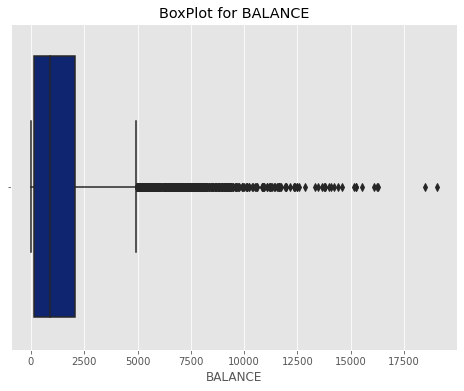

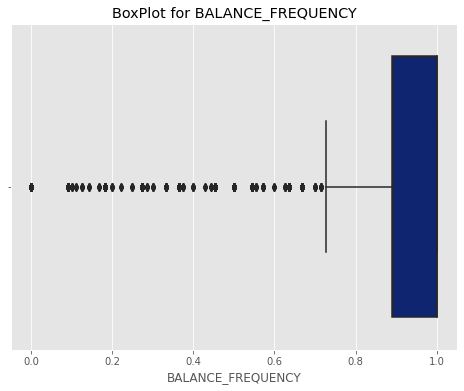

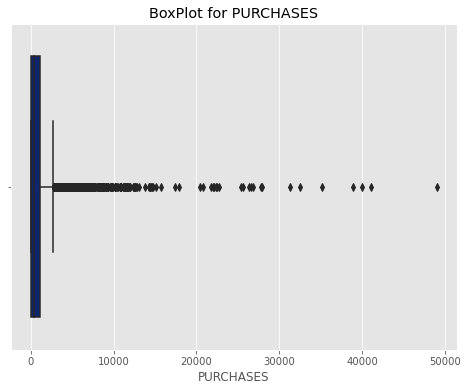

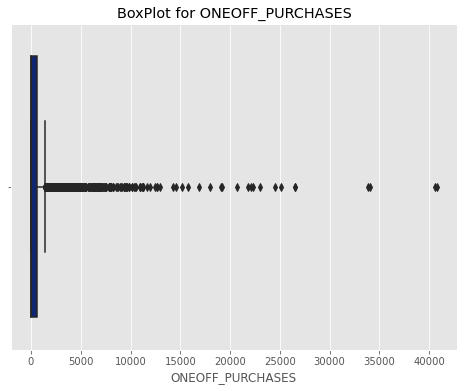

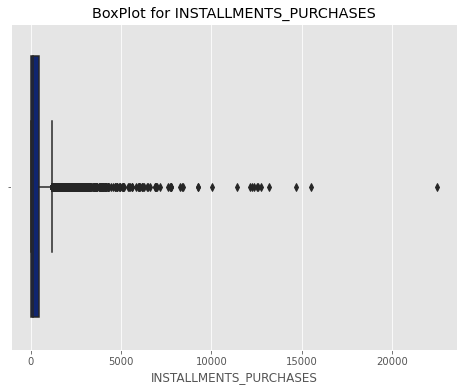

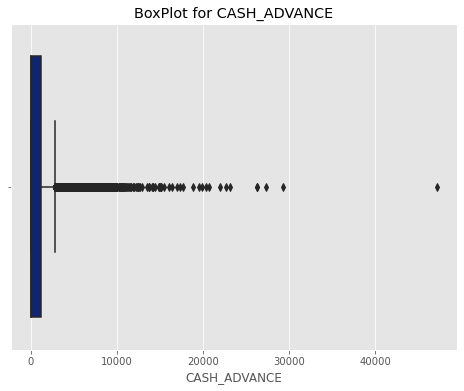

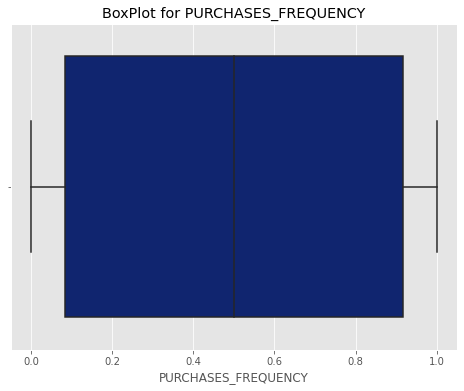

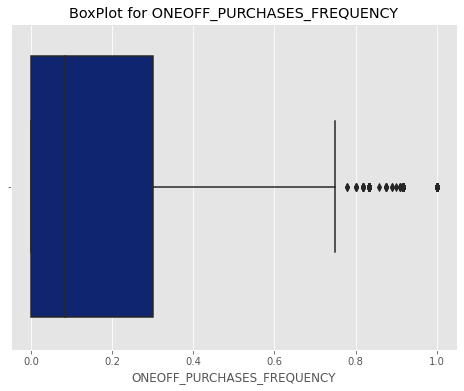

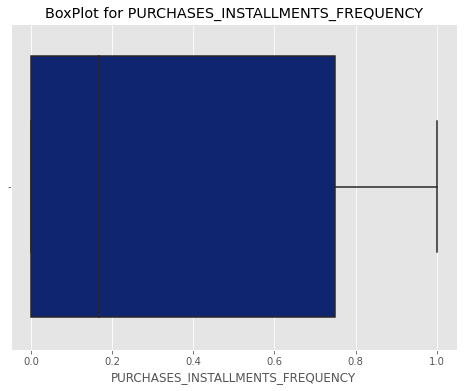

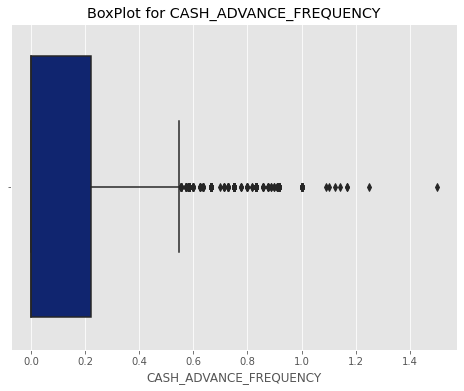

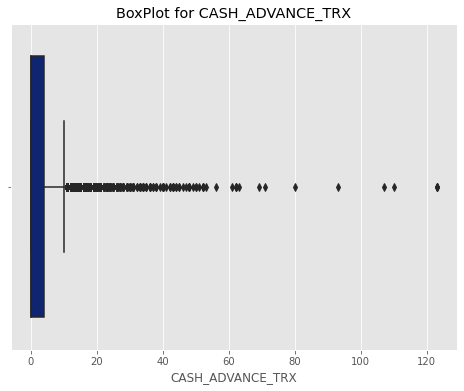

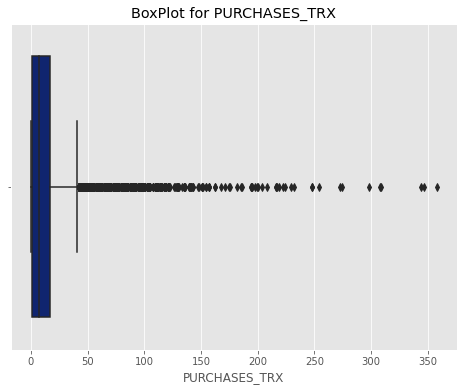

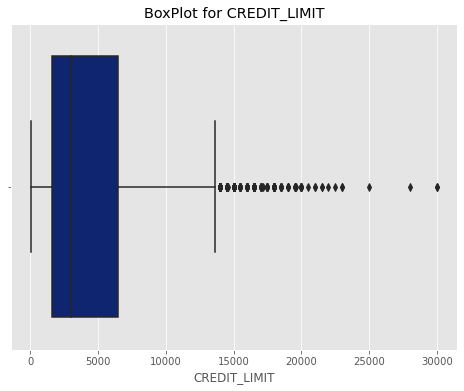

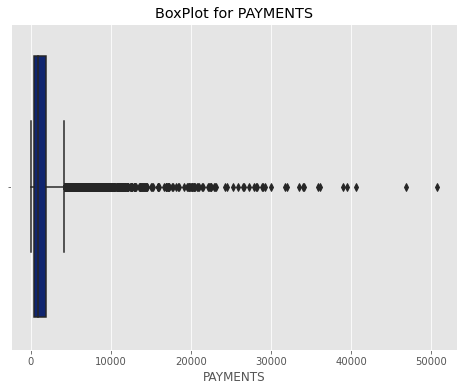

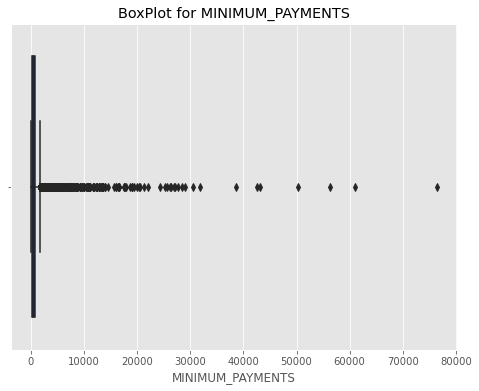

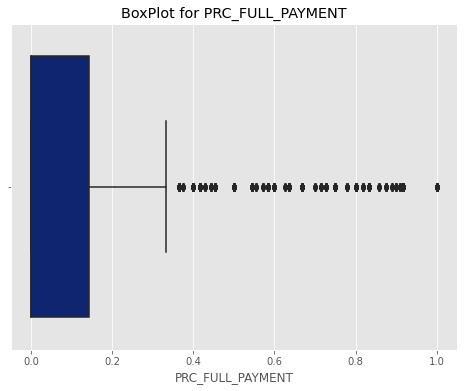

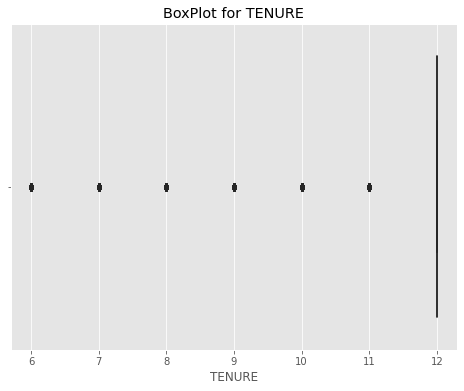

In [18]:
# plotting Box Plots for each of the numeric columns

for i in num_vars:
    sns.boxplot( df[i], palette='dark' )
    plt.title( 'BoxPlot for {}'.format(i) )
    plt.show()

Using IQR Method or Z-score to cap the outliers would have been deleted for those respective values. Hence, `transforming the data` by applying `PowerTransformer` to treat for outliers

In [19]:
from sklearn.preprocessing import PowerTransformer

PT = PowerTransformer()
print( PT.fit_transform(df) )

[[-1.23833786 -1.0801604  -0.36831098 ... -0.82502551 -0.67793662
   0.42210751]
 [ 1.05188287 -0.4256199  -1.50536123 ...  0.91748237  1.23484635
   0.42210751]
 [ 0.86050618  0.62852726  0.52149237 ...  0.4759187  -0.67793662
   0.42210751]
 ...
 [-1.40957025 -0.9921333  -0.21655169 ... -1.30177584  1.32828513
  -2.52719186]
 [-1.55874115 -0.9921333  -1.50536123 ... -1.66214063  1.32828513
  -2.52719186]
 [-0.32454944 -1.6469605   0.70189133 ... -1.23886969 -0.67793662
  -2.52719186]]


In [20]:
df.shape

(8949, 17)

## Building KPIs to understand customer profiles

### 1. Monthly average purchases

In [21]:

print('The average monthly purchase for the customers are as follows:')

Monthly_Avg_Purchase = df['PURCHASES']/df['TENURE']

print(Monthly_Avg_Purchase)

The average monthly purchase for the customers are as follows:
0         7.950000
1         0.000000
2        64.430833
3       124.916667
4         1.333333
           ...    
8944     48.520000
8945     50.000000
8946     24.066667
8947      0.000000
8948    182.208333
Length: 8949, dtype: float64


In [22]:
# adding Monthly Average Purchase to the df 
df['Monthly_Avg_Purchase'] = df['PURCHASES']/df['TENURE']

### 2. Monthly Average Cash Advance Amount

In [23]:

print('The average monthly cash advance for the customers are as follows:')

Monthly_Avg_Cash = df['CASH_ADVANCE']/df['TENURE']

print(Monthly_Avg_Cash)

# adding Monthly Average Cash Advance Amount to the df 
df['Monthly_Avg_Cash'] = df['CASH_ADVANCE']/df['TENURE']

The average monthly cash advance for the customers are as follows:
0         0.000000
1       536.912124
2         0.000000
3        17.149001
4         0.000000
           ...    
8944      0.000000
8945      0.000000
8946      0.000000
8947      6.093130
8948     21.173335
Length: 8949, dtype: float64


## 3. Division of Customers based on the type of Purchases (One-Off, Installments)

Understanding how the customers spend on the basis of the type of purchases: One-Off purchase OR do they make purchases in installments. 
    They are spender of both the categories or none.

In [24]:
# Step 1: Seperating the Type of Purchases data in another datframe,

df_purchases = df[['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

df_purchases

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8944,0.00,291.12
8945,0.00,300.00
8946,0.00,144.40
8947,0.00,0.00


In [25]:
df_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ONEOFF_PURCHASES        8949 non-null   float64
 1   INSTALLMENTS_PURCHASES  8949 non-null   float64
dtypes: float64(2)
memory usage: 140.0 KB


In [26]:
# Step 2: Filtering on the categories and taking the count of those categories:

# 1: customers belonging to neither group
df_purchases[ (df_purchases['ONEOFF_PURCHASES'] == 0) & (df_purchases['INSTALLMENTS_PURCHASES'] == 0) ].shape

(2041, 2)

In [27]:

# 2: customers belonging to the One-Off purchaser group only
df_purchases[(df_purchases['ONEOFF_PURCHASES'] > 0) & (df_purchases['INSTALLMENTS_PURCHASES'] == 0)].shape

(1874, 2)

In [28]:
# 3. customers belonging to the Installments-purchasers group only
df_purchases[(df_purchases['ONEOFF_PURCHASES'] == 0) & (df_purchases['INSTALLMENTS_PURCHASES'] > 0)].shape

(2260, 2)

In [29]:
# 4. customers belonging to both the groups
df_purchases[(df_purchases['ONEOFF_PURCHASES'] > 0) & (df_purchases['INSTALLMENTS_PURCHASES'] > 0)].shape

(2774, 2)

In [30]:
2041+1874+2260+2774 == 8949

True


We can see that the total 8949 customers who have credit card are divided into 4 parts. Hence, will be creating categories to group customers based on their purchase type.

The 4 categories are:

1) Both_the_Purchases
2) Installment_Purchases
3) None_Of_the_Purchases
4) One_Of_Purchase

In [31]:
df['Purchase_Type'] = np.where( 
                        (df['ONEOFF_PURCHASES'] == 0) & (df['INSTALLMENTS_PURCHASES'] == 0), 
                        'None_Of_the_Purchases',            # if true
                        np.where(                           # if false
                            (df['ONEOFF_PURCHASES'] > 0) & (df['INSTALLMENTS_PURCHASES'] == 0), 
                            'One_Of_Purchase',              # if true
                            np.where(                       # if false
                                (df_purchases['ONEOFF_PURCHASES'] == 0) & (df_purchases['INSTALLMENTS_PURCHASES'] > 0),
                                'Installment_Purchases',    # if true
                                'Both_the_Purchases'        # if false
                            )
                        )
                    )

# Purchase Type Categories are as follows:
df['Purchase_Type'].value_counts()

Both_the_Purchases       2774
Installment_Purchases    2260
None_Of_the_Purchases    2041
One_Of_Purchase          1874
Name: Purchase_Type, dtype: int64

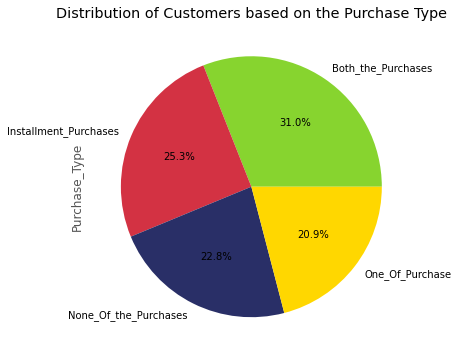

In [32]:
# Plotting the distribution of customer on basis of Purhcase_Type

df['Purchase_Type'].value_counts().sort_index().plot(
                                                        kind='pie',
                                                        autopct='%1.01f%%', 
                                                        colors = [
                                                            '#87d42f','#d33243','#292f67','#FFD700'
                                                        ],
                                                        fontsize=10,
                                                        textprops = {
                                                            'fontsize': 18
                                                        }
                                                    )
                                                    
plt.title('Distribution of Customers based on the Purchase Type')
plt.show()

> ## Inference:

> There are 31% of the customers who make purchases for both the types: One Off and Installment Purchases followed by 25.3% customer who make only installment purchases.


## 4. `Average Amount per purchase transaction` and `Average amount per cash-advance transaction` is provided to us in the data in attributes as PURCHASES_TRX and CASH_ADVANCE_TRX.

## 5. Estimating the `Limit Usage` of customers

Computing the `ratio of balance to credit limit` for each customer. 
<br />
<ins>Balance-to-Limit ratio is also known as the utilization rate</ins>. 
- A `higher` utilization rate indicates `presence of credit risk`. 
- Hence, a lower utilization rate (balance-to-limit ratio) is desirable.

In [33]:
df['Limit_Usage'] = df['BALANCE']/df['CREDIT_LIMIT']
df['Limit_Usage']

0       0.040901
1       0.457495
2       0.332687
3       0.222223
4       0.681429
          ...   
8944    0.028494
8945    0.019183
8946    0.023399
8947    0.026915
8948    0.310590
Name: Limit_Usage, Length: 8949, dtype: float64

## 6. Payments-to-Minimum_Payments Ratio

In [34]:
df['Pay_to_MinimumPay'] = df['PAYMENTS'] / df['MINIMUM_PAYMENTS']

df['Pay_to_MinimumPay']

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8944    6.660231
8945    0.882891
8946    0.986076
8947    0.942505
8948    0.715439
Name: Pay_to_MinimumPay, Length: 8949, dtype: float64

## Insights using KPIs
To gain insights on the customer profiles, we shall explore the data using the Purchase_Type feature `over other attributes` to understand how the customers behave

### a. Pay_to_MinimumPay over Purchase Type

In [35]:
# Step1: Find the average of Pay_to_MinimumPay for each of the Purchase Type 

t1 = df.groupby( by=['Purchase_Type'] )['Pay_to_MinimumPay'].mean().sort_values( ascending=False )

t1

Purchase_Type
Installment_Purchases    13.258996
None_Of_the_Purchases    10.092080
Both_the_Purchases        7.236979
One_Of_Purchase           5.571042
Name: Pay_to_MinimumPay, dtype: float64

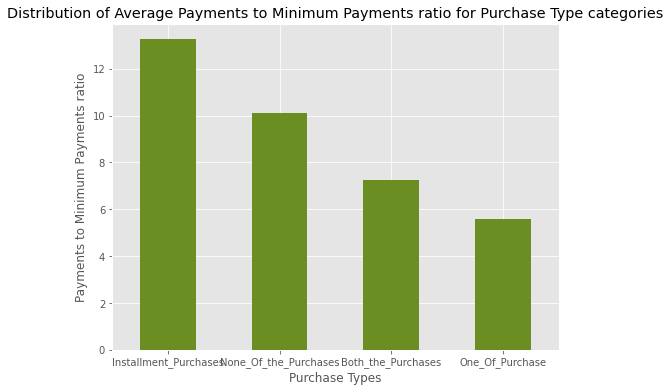

In [36]:
# Step 2: Plot the graph

t1.plot(kind='bar',color='olivedrab')

plt.title('Distribution of Average Payments to Minimum Payments ratio for Purchase Type categories')
plt.xlabel('Purchase Types')
plt.ylabel('Payments to Minimum Payments ratio')
plt.xticks(rotation=0)

plt.show()

> ## Inference:
> Customers who made the installment purchases paid the highest average minimum payment dues

### b. Balance to Credit Limit ratio (or Utilization rate) over Purchase Type

In [37]:

# Step 1: Find the average of Limit Usage i.e of the credit card score for each of the Purchase Type:

t2 = df.groupby( ['Purchase_Type'] )['Limit_Usage'].mean().sort_values(ascending = True).reset_index()
t2

,Purchase_Type,Limit_Usage
0,Installment_Purchases,0.271678
1,Both_the_Purchases,0.353548
2,One_Of_Purchase,0.381074
3,None_Of_the_Purchases,0.574049


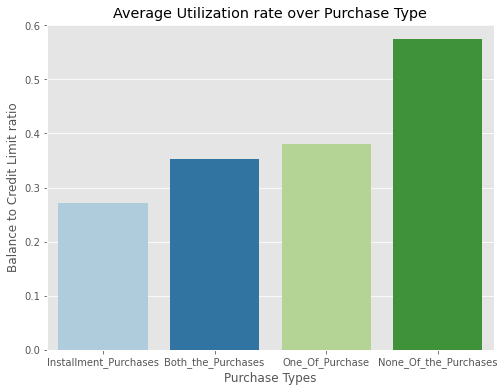

In [38]:
# Step 2: Plot the graph of Average Utilization rate over Purchase type

sns.barplot( t2['Purchase_Type'], t2['Limit_Usage'], palette='Paired' )

plt.title('Average Utilization rate over Purchase Type')
plt.xlabel('Purchase Types')
plt.ylabel('Balance to Credit Limit ratio')

plt.show()

> ## Inference:
> A lower balance-to-limit ratio is desirable which indicates there is low credit risk. The customers who make installment purchases have the lowest utilization rate. Hence, lowest credit risk

## c. Monthly_Avg_Purchase over Purchase Type

In [39]:
df1 = df.copy()
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash,Purchase_Type,Limit_Usage,Pay_to_MinimumPay
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,Installment_Purchases,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,None_Of_the_Purchases,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,One_Of_Purchase,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,312.452292,0.000000,12,124.916667,17.149001,One_Of_Purchase,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,One_Of_Purchase,0.681429,2.771075


In [40]:
df1.shape

(8949, 22)

In [41]:
# Step 1: Find the average of Monthly Average Purchase for each Purchase Type

t3 = df.groupby(by=['Purchase_Type'])['Monthly_Avg_Purchase'].mean().sort_values(ascending=False) 
t3

Purchase_Type
Both_the_Purchases       192.685172
One_Of_Purchase           69.688958
Installment_Purchases     46.974347
None_Of_the_Purchases      0.000000
Name: Monthly_Avg_Purchase, dtype: float64

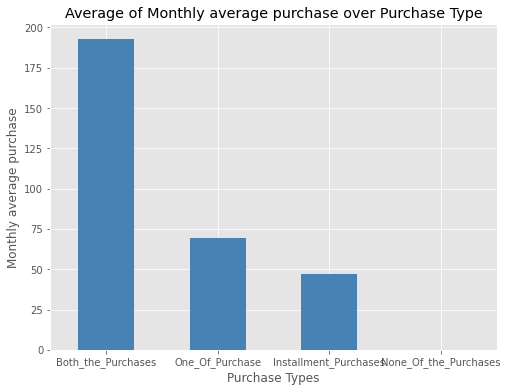

In [42]:
# Step 2: Plot the graph

t3.plot(kind='bar',color='steelblue')

plt.title('Average of Monthly average purchase over Purchase Type')
plt.xlabeliuujj('Purchase Types')
plt.ylabel('Monthly average purchase')
plt.xticks(rotation=0)

plt.show()

> ## Inference:

> The customers who made both the one off and installment purchases have made the highest total average purchase amount over the last 12 months.

## d. Monthly_Cash_Advance over Purchase Type

In [43]:
# Step 1: Find the average of Monthly Average Cash Advance for each Purchase Type

t4 = df.groupby(['Purchase_Type'])['Monthly_Avg_Cash'].mean().sort_values(ascending=False).reset_index()
t4

,Purchase_Type,Monthly_Avg_Cash
0,None_Of_the_Purchases,182.932504
1,One_Of_Purchase,78.995966
2,Both_the_Purchases,67.821985
3,Installment_Purchases,38.398206


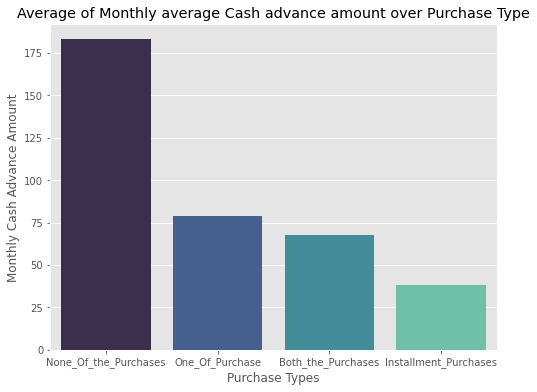

In [44]:

# Step 2: Plot the graph:

sns.barplot(t4['Purchase_Type'], t4['Monthly_Avg_Cash'], palette='mako')

plt.title('Average of Monthly average Cash advance amount over Purchase Type')
plt.xlabel('Purchase Types')
plt.ylabel('Monthly Cash Advance Amount')

plt.show()

> ## Inference:
> The customers who made neither the one off purchase nor the installments purchase have made the highest monthly average cash in advance amount.

## Correlation Matrix
To find the relationships between the features, plotting the correlation matrix:

Dropping the original variables 'BALANCE','PURCHASES','PAYMENTS','MINIMUM_PAYMENTS','TENURE','CASH_ADVANCE' `which were used to create the new variables`. 
> These variables will be `correlated` with derived variables `increasing the redundancy` in the data.



In [45]:
df.drop(['BALANCE','CREDIT_LIMIT','PURCHASES','PAYMENTS','MINIMUM_PAYMENTS','TENURE','CASH_ADVANCE'], axis=1, inplace=True)

corr_df = df.corr()
corr_df

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
BALANCE_FREQUENCY,1.000000,0.104257,0.124204,0.229440,0.202295,0.175869,0.192022,0.141516,0.189527,-0.095308,0.131188,0.085963,0.404557,-0.089340
ONEOFF_PURCHASES,0.104257,1.000000,0.330610,0.264913,0.524881,0.127699,-0.082622,-0.046226,0.545514,0.132745,0.913059,-0.034557,-0.042254,0.010298
INSTALLMENTS_PURCHASES,0.124204,0.330610,1.000000,0.442398,0.214016,0.511334,-0.132312,-0.074017,0.628097,0.182548,0.677016,-0.067799,-0.058318,0.020618
PURCHASES_FREQUENCY,0.229440,0.264913,0.442398,1.000000,0.501305,0.862921,-0.308483,-0.203541,0.568408,0.305761,0.395310,-0.215846,-0.201944,0.011399
ONEOFF_PURCHASES_FREQUENCY,0.202295,0.524881,0.214016,0.501305,1.000000,0.142270,-0.111707,-0.069116,0.544849,0.157497,0.499694,-0.089059,-0.092089,-0.004556
PURCHASES_INSTALLMENTS_FREQUENCY,0.175869,0.127699,0.511334,0.862921,0.142270,1.000000,-0.262955,-0.169250,0.529949,0.250049,0.314106,-0.179373,-0.161536,0.017915
CASH_ADVANCE_FREQUENCY,0.192022,-0.082622,-0.132312,-0.308483,-0.111707,-0.262955,1.000000,0.799573,-0.131161,-0.249768,-0.116102,0.628321,0.360168,-0.021861
CASH_ADVANCE_TRX,0.141516,-0.046226,-0.074017,-0.203541,-0.069116,-0.169250,0.799573,1.000000,-0.066180,-0.169807,-0.065716,0.633291,0.252596,-0.016119
PURCHASES_TRX,0.189527,0.545514,0.628097,0.568408,0.544849,0.529949,-0.131161,-0.066180,1.000000,0.162037,0.682573,-0.083411,-0.043794,0.013472
PRC_FULL_PAYMENT,-0.095308,0.132745,0.182548,0.305761,0.157497,0.250049,-0.249768,-0.169807,0.162037,1.000000,0.181755,-0.151386,-0.415701,0.018459


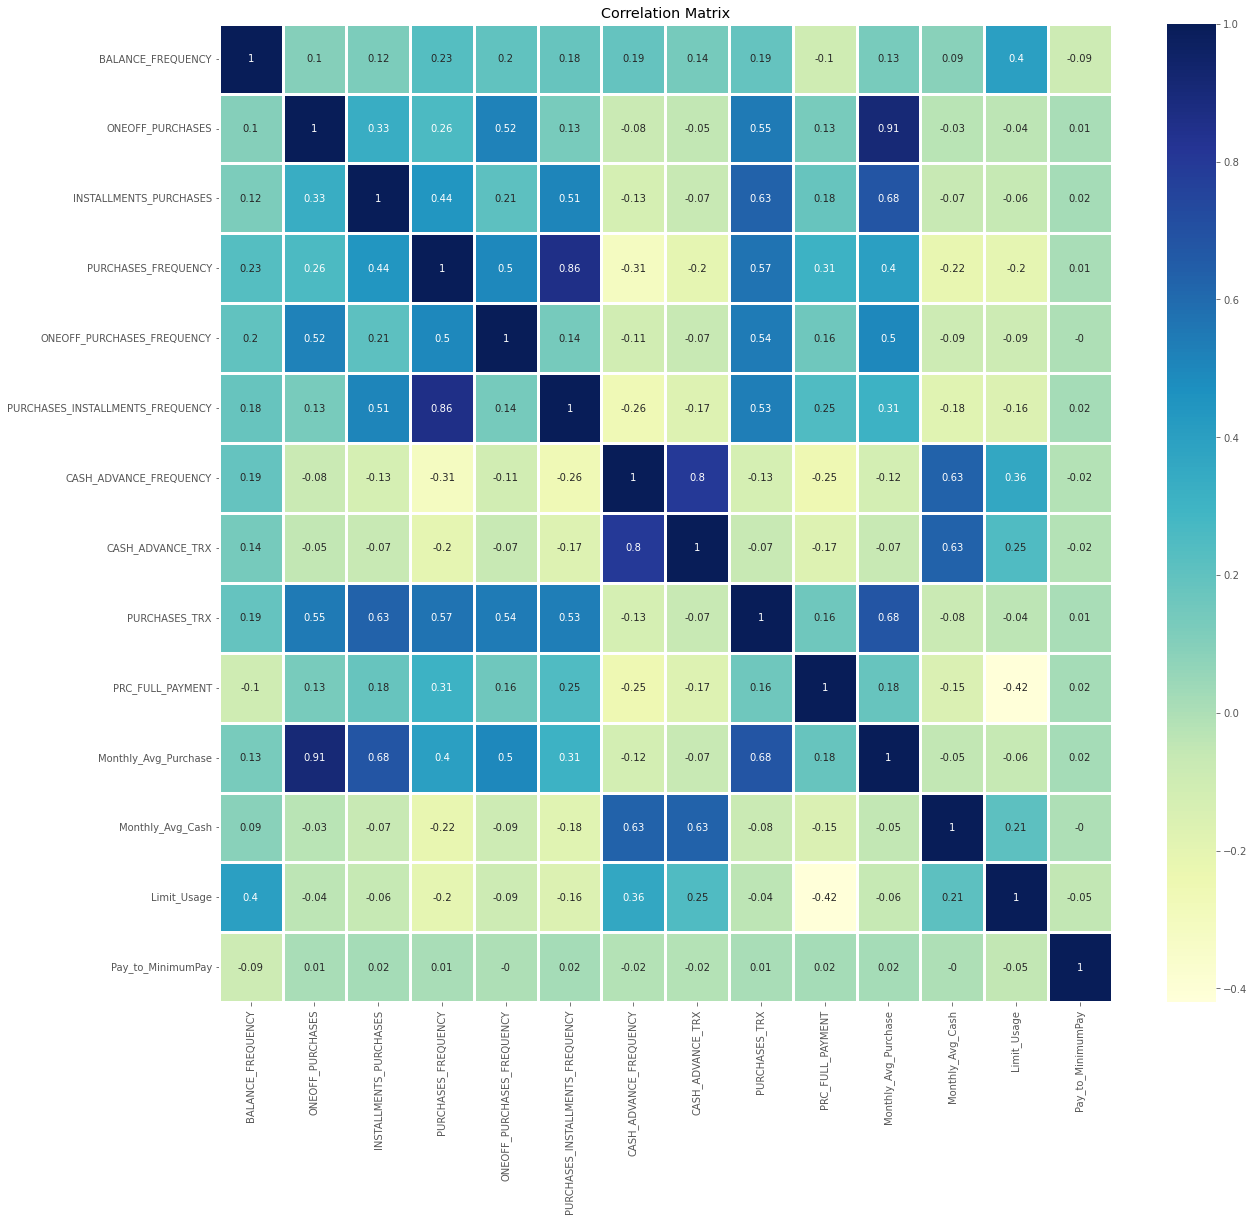

In [46]:
### finding Correlation among the variables:

plt.figure(figsize=(20,18))
sns.heatmap( round( df.corr(), 2 ), annot=True, cmap='YlGnBu', linewidths=3, fmt='.2g' )
plt.title('Correlation Matrix')

plt.show()

> ## Inference:
> 
> The correlation value above 0.50 is considered to be highly correlated. From the above heatmap, can observe the following:
> 1. OneOFF_Purchases is highly positively correlated with Monthly_Avg_Purchase with 0.91 correlation.
> 2. Installment_Purchases is correlated with Purchases_Trx having a correlation of 0.63 and with Monthly_Avg_Purchase having a correlation of 0.68.
> 3. Purchases_Frequency is positively correlated with Purchases_Installment_Frequency with 0.86 correlation and also with Purchases_Trx having a correlation of 0.57.
> 4. Cash_Advance_Frequency is highly positively correlated with Cash_Advance_Trx  with correlation of 0.80 and with Monthly_Avg_Cash having a correlation of 0.63.
> 5. Cash_Advance_Trx is also positively correlated with Monthly_Avg_Cash with correlation of 0.63.
> 6. Purchases_Trx is positively correlated with Monthly_Avg_Purchase with 0.68 correlation.
>
>
> We can see that there is `multi-colinearity` present in the data and would `need to use dimension reduction` technique as double redundancy information is being fed to the model.



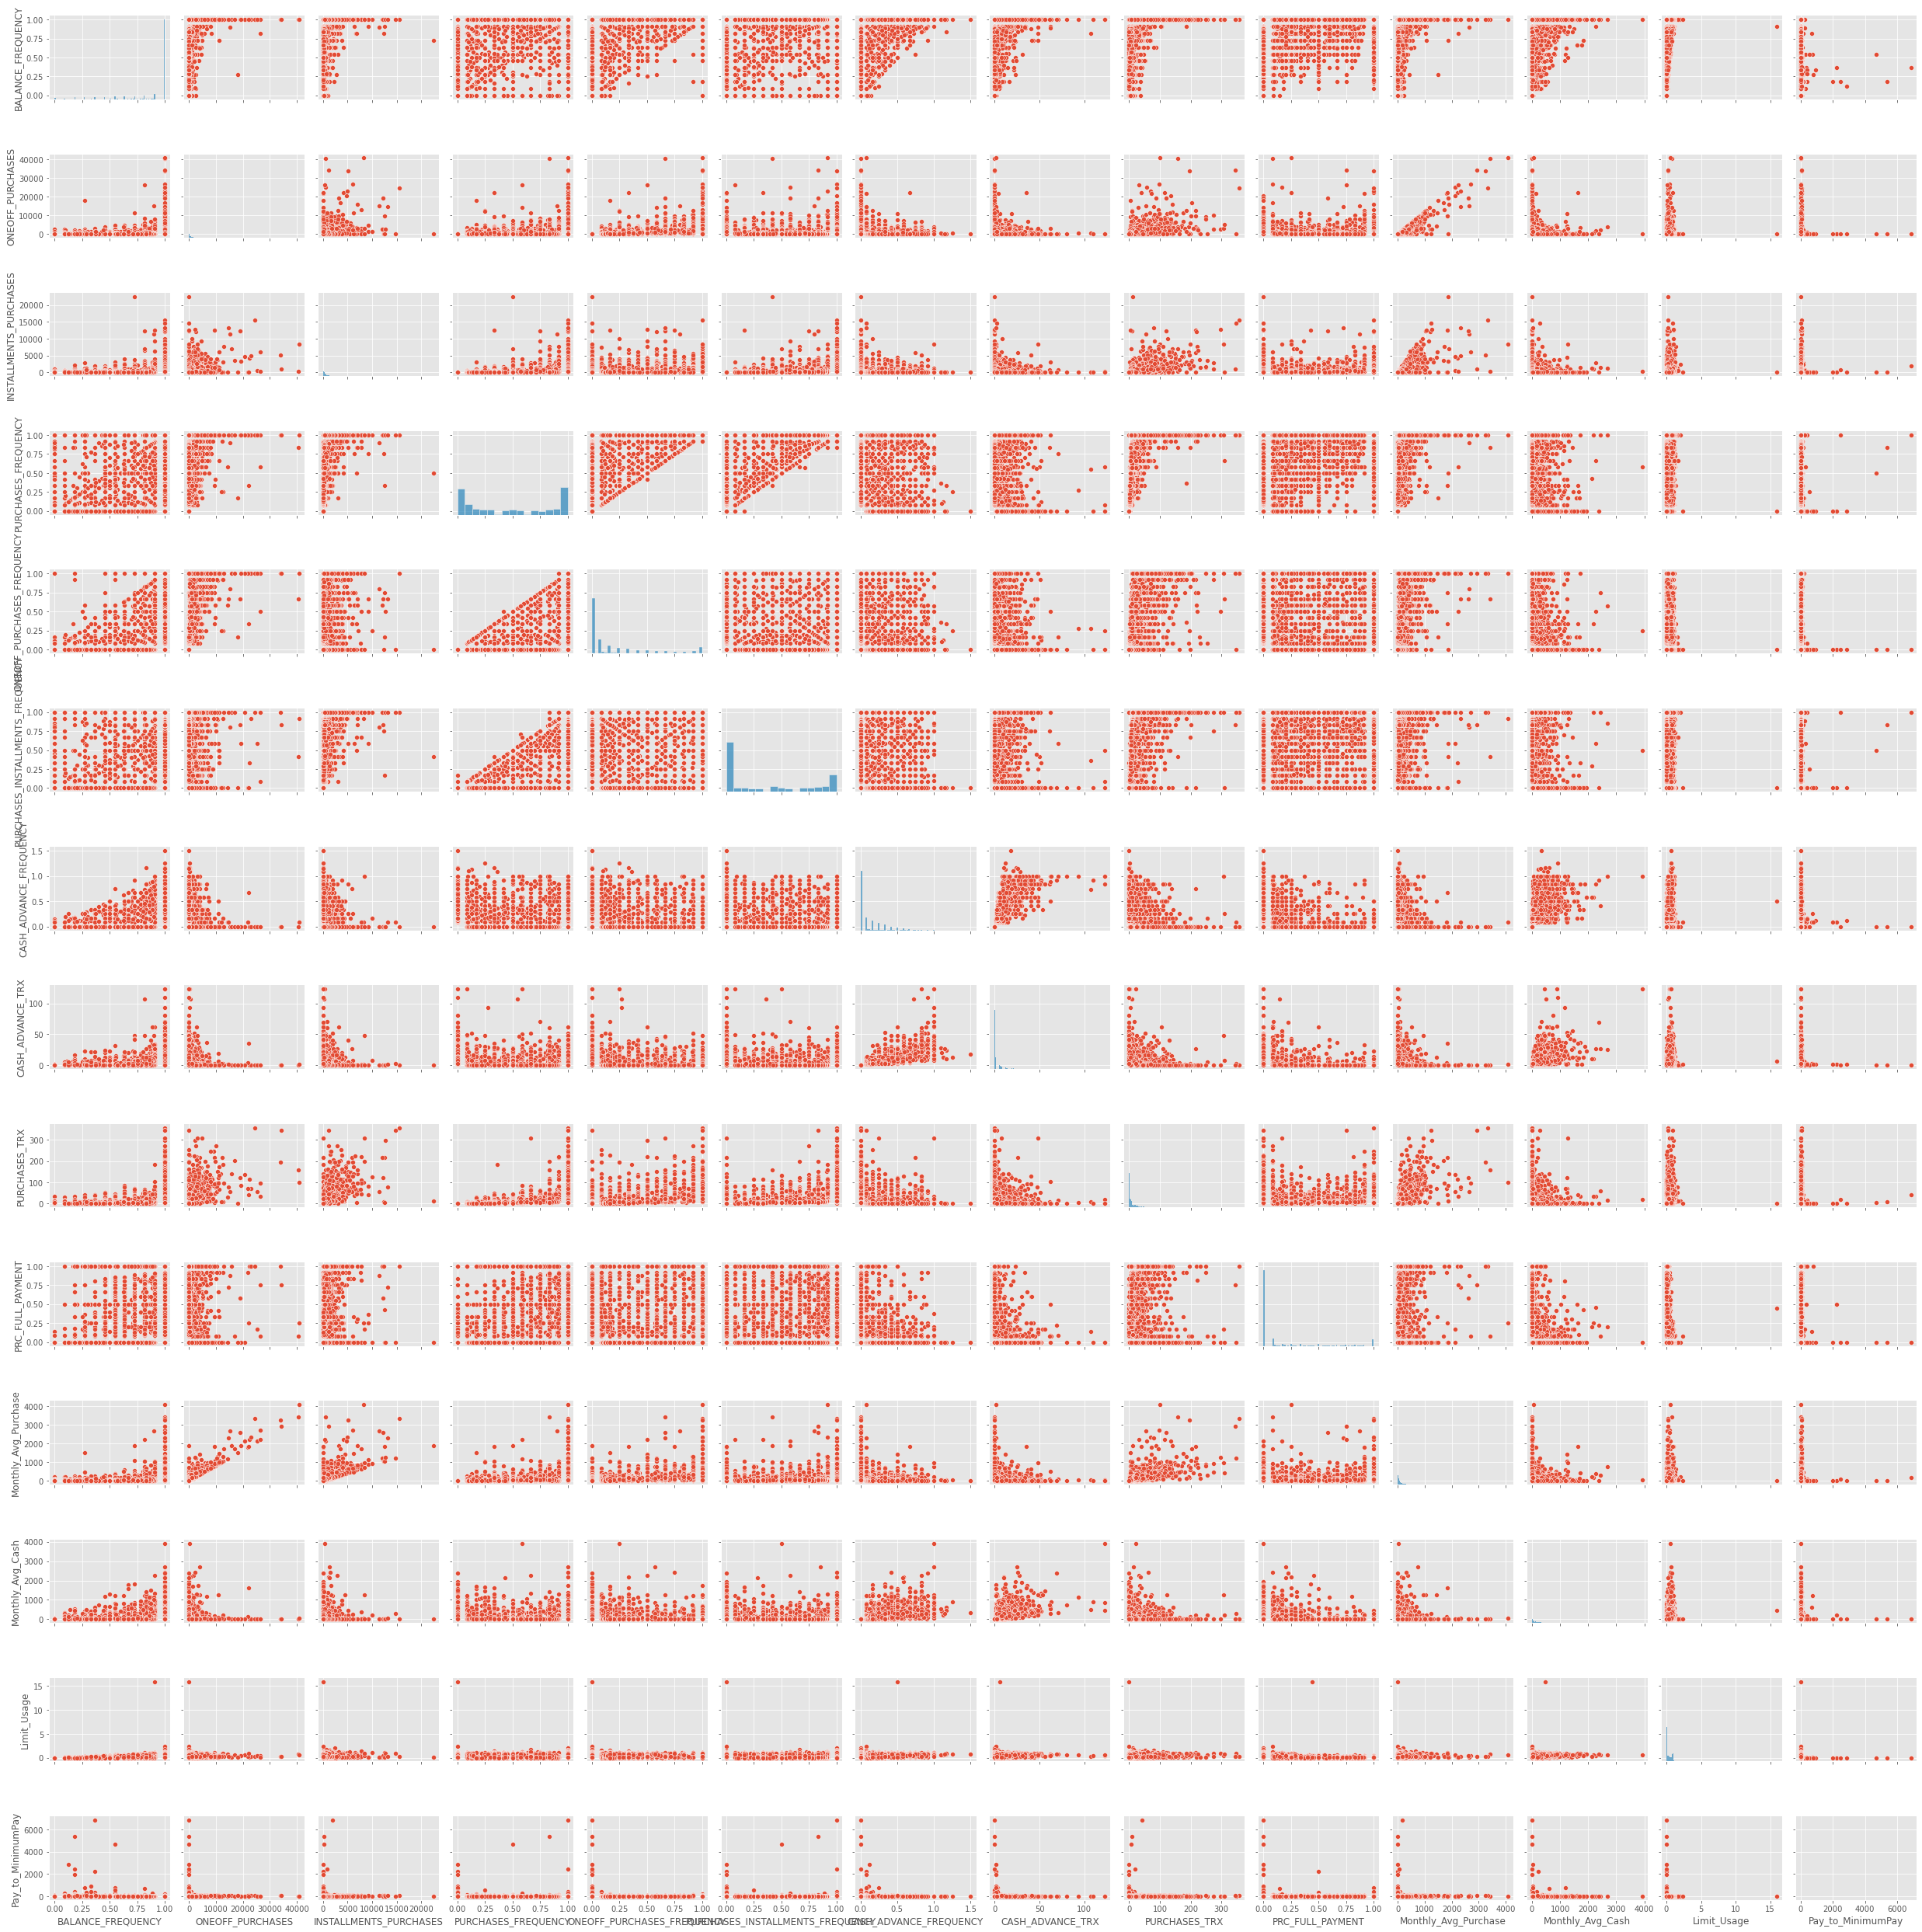

In [47]:
# Plotting pair plots

sns.pairplot(df)

plt.show()

### Though the readability is difficult, it can be seen from the pairplots that the variables that showed correlation have linear relationships

## Preparing the data to model

In [48]:
df.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT',
       'Monthly_Avg_Purchase', 'Monthly_Avg_Cash', 'Purchase_Type',
       'Limit_Usage', 'Pay_to_MinimumPay'],
      dtype='object')

In [49]:
# creating DUMMY variables for PURCHASE_TYPE (the categorical variable)

x_cat = pd.get_dummies( df['Purchase_Type'], drop_first=True )
x_cat

# drop_first=True helps reduce the dimensionality of the variable Purchase_Type as there will only be 3 categories instead of 4 
#   (with the fourth being calculated using the states of the other 3; if ALL_3 are 0 => the 4th is 1)

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
8944,1,0,0
8945,1,0,0
8946,1,0,0
8947,0,1,0


In [50]:
# Filtering out the numerical variables

x_num = df.dtypes[ df.dtypes != 'object' ].index.to_list()
x_num

['BALANCE_FREQUENCY',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'PRC_FULL_PAYMENT',
 'Monthly_Avg_Purchase',
 'Monthly_Avg_Cash',
 'Limit_Usage',
 'Pay_to_MinimumPay']

In [51]:
# Filtering out the numerical variables in df1 (the copy of df)

x_num_df1 = df1.dtypes[ df1.dtypes != 'object' ].index.to_list()
x_num_df1, len(x_num_df1)

(['BALANCE',
  'BALANCE_FREQUENCY',
  'PURCHASES',
  'ONEOFF_PURCHASES',
  'INSTALLMENTS_PURCHASES',
  'CASH_ADVANCE',
  'PURCHASES_FREQUENCY',
  'ONEOFF_PURCHASES_FREQUENCY',
  'PURCHASES_INSTALLMENTS_FREQUENCY',
  'CASH_ADVANCE_FREQUENCY',
  'CASH_ADVANCE_TRX',
  'PURCHASES_TRX',
  'CREDIT_LIMIT',
  'PAYMENTS',
  'MINIMUM_PAYMENTS',
  'PRC_FULL_PAYMENT',
  'TENURE',
  'Monthly_Avg_Purchase',
  'Monthly_Avg_Cash',
  'Limit_Usage',
  'Pay_to_MinimumPay'],
 21)

### the numeric variables from `df1` concatenated with `x_cat` (the dummy variables for Purchase_Type from df)

## BUT `without` scaling the numerical variables

In [52]:
original_df = pd.concat( [ x_cat, df1[ x_num_df1 ] ], axis='columns' )
original_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
0,1,0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508
1,0,1,0,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241
2,0,0,1,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682
3,0,0,1,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,...,1,7500.0,0.000000,312.452292,0.000000,12,124.916667,17.149001,0.222223,0.000000
4,0,0,1,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075


In [86]:
# testing
'BALANCE' in df.columns, len(x_num), x_scaled.shape, len(x_cat.columns), original_df.shape, concat_df.shape

(False, 14, (8949, 14), 3, (8949, 24), (8949, 17))

In [77]:
# testing
original_df['BALANCE'].dtypes == np.number, original_df['BALANCE'].dtypes == 'object'

(True, False)

## Scaling the numeric variables in `df`

In [53]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

In [54]:
x_scaled = pd.DataFrame( SS.fit_transform( df[ x_num ] ), columns=x_num )
x_scaled.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
0,-0.249881,-0.356957,-0.349114,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.525588,-0.433418,-0.460737,-0.893059,-0.064423
1,0.134049,-0.356957,-0.454607,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.234159,-0.477461,2.319245,0.175953,-0.044287
2,0.517980,0.108843,-0.454607,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,-0.525588,-0.120516,-0.460737,-0.144316,-0.068272
3,-1.017743,0.546123,-0.454607,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,-0.525588,0.214573,-0.371944,-0.427774,-0.076663
4,0.517980,-0.347317,-0.454607,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.525588,-0.470074,-0.460737,0.750582,-0.053215


## combining the categorical variables of `df` (from the dataset `x_cat`) and the scaled numeric variables (from the dataset `x_scaled`)

In [55]:
concat_df = pd.concat( [ x_cat, x_scaled ], axis='columns' )
concat_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
0,1,0,0,-0.249881,-0.356957,-0.349114,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.525588,-0.433418,-0.460737,-0.893059,-0.064423
1,0,1,0,0.134049,-0.356957,-0.454607,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.234159,-0.477461,2.319245,0.175953,-0.044287
2,0,0,1,0.517980,0.108843,-0.454607,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,-0.525588,-0.120516,-0.460737,-0.144316,-0.068272
3,0,0,1,-1.017743,0.546123,-0.454607,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,-0.525588,0.214573,-0.371944,-0.427774,-0.076663
4,0,0,1,0.517980,-0.347317,-0.454607,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.525588,-0.470074,-0.460737,0.750582,-0.053215


# Performing PCA

### to reduce the dimensionality of the concatenated dataset

In [56]:
from sklearn.decomposition import PCA

# step 1: SCALE the date -> done

# step 2: Find the covariance matrix

cov_matrix = np.cov( concat_df.T )
print(cov_matrix.shape)
print('Covariance Matrix:', cov_matrix)


(17, 17)
Covariance Matrix: [[ 0.18878572 -0.05760378 -0.05289048 -0.05855883 -0.09015665  0.03540427
   0.12856082 -0.17142362  0.1868402  -0.1030289  -0.07341032 -0.02855805
   0.08574557 -0.05486451 -0.06615361 -0.07599021  0.00897372]
 [-0.05760378  0.17607385 -0.04776526  0.00518779 -0.08142023 -0.10369386
  -0.27862371 -0.15481222 -0.20909041  0.15684113  0.10204653 -0.13498277
  -0.08526858 -0.10890678  0.11095414  0.10835407  0.0019918 ]
 [-0.05289048 -0.04776526  0.1655753  -0.03628075  0.02451854 -0.09520935
  -0.08840125  0.08304779 -0.19206814 -0.00992445 -0.00972336 -0.06404633
  -0.03673949 -0.01913927 -0.01083133 -0.00422013 -0.00618309]
 [-0.05855883  0.00518779 -0.03628075  1.00011176  0.1042684   0.12421758
   0.22946609  0.20231737  0.17588838  0.19204378  0.14153225  0.18954776
  -0.09531866  0.13120311  0.08597276  0.40460218 -0.08935015]
 [-0.09015665 -0.08142023  0.02451854  0.1042684   1.00011176  0.33064653
   0.26494216  0.52493992  0.12771371 -0.0826314  -0.0

In [57]:
# step 3: Calculating the Eigen_Values and the Eigen_Vectors

eig_val, eig_vec = np.linalg.eig( cov_matrix )

print( len( eig_val ) )
print( eig_vec.shape )

17
(17, 17)


In [58]:
print( 'Eigen Value\n', eig_val, '\n\nEigen Vector\n', eig_vec )

Eigen Value
 [4.39676109 2.63000669 1.46128961 1.30796423 1.00416405 0.91491162
 0.69314392 0.47418763 0.43347583 0.41105916 0.28858693 0.19672233
 0.15896349 0.08921346 0.00446266 0.02813756 0.0389492 ] 

Eigen Vector
 [[-2.16214195e-02  9.60677046e-02 -1.67381856e-01 -8.19928834e-02
   3.57899991e-02 -9.84994683e-02 -2.44027882e-02 -2.11899671e-01
  -5.56474223e-02 -3.60667634e-02 -4.02520605e-02 -1.48532851e-01
  -2.33858365e-01  8.34225681e-01  3.69341072e-03  3.46267956e-01
  -2.16081494e-02]
 [ 1.11657548e-01 -4.90282698e-02  5.65895947e-02  1.17156465e-02
   3.87011677e-02 -7.96232725e-02 -1.32863134e-01  6.48391206e-02
   4.72425183e-02  1.49445350e-04  2.50198107e-01  2.89863493e-01
   4.53616465e-01  1.23152526e-02  5.81280017e-03  5.27284617e-01
   5.65031484e-01]
 [ 3.02717103e-02  8.40584979e-03  1.46726683e-01  5.29253320e-02
  -5.12449464e-02  1.02322672e-01  5.16997856e-02  8.43400519e-02
   4.57082809e-03  3.69491736e-02 -2.27176821e-01 -3.25503001e-01
  -5.61519210e-0

In [59]:
# Making the Eigen pairs

eigen_pairs = [ ( eig_val[i], eig_vec[:,i] ) for i in range( len( eig_val ) ) ]
eigen_pairs_sorted = sorted( eigen_pairs, reverse=True )
eigen_pairs_sorted


[(4.396761089139235,
  array([-0.02162142,  0.11165755,  0.03027171, -0.07173433, -0.30270902,
         -0.32739929, -0.38171339, -0.28861833, -0.3318286 ,  0.21853131,
          0.17351632, -0.38152007, -0.18975218, -0.37256518,  0.16498787,
          0.13210595, -0.01260599])),
 (2.630006685997938,
  array([ 0.0960677 , -0.04902827,  0.00840585, -0.29164142, -0.22655385,
         -0.13903038,  0.0117135 , -0.15673379,  0.03093428, -0.46087762,
         -0.45129153, -0.19636501,  0.17364966, -0.23642408, -0.4026365 ,
         -0.32083287,  0.03455803])),
 (1.4612896098974275,
  array([-0.16738186,  0.05658959,  0.14672668, -0.3209552 ,  0.46298755,
         -0.11001405, -0.37127815,  0.24806605, -0.52515391, -0.07194792,
         -0.09240445, -0.00329271,  0.00924793,  0.31325764, -0.04430237,
         -0.15543862,  0.06740088])),
 (1.3079642323690817,
  array([-0.08199288,  0.01171565,  0.05292533,  0.42205742,  0.05625818,
         -0.0978938 , -0.05138038,  0.11611515, -0.11960896,

In [60]:
# testing
eigen_pairs_sorted[ 1 ] [ 0 ]

2.630006685997938

In [61]:
# testing
eigen_pairs_sorted[ 1 ] [ 1 ]

array([ 0.0960677 , -0.04902827,  0.00840585, -0.29164142, -0.22655385,
       -0.13903038,  0.0117135 , -0.15673379,  0.03093428, -0.46087762,
       -0.45129153, -0.19636501,  0.17364966, -0.23642408, -0.4026365 ,
       -0.32083287,  0.03455803])

In [62]:
# step 4: sorting the Eigen Vectors and Eigen Values

eig_val_sorted = [ eigen_pairs_sorted[ i ] [ 0 ] for i in range( len( eig_val ) ) ]
eig_vec_sorted = [ eigen_pairs_sorted[ i ] [ 1 ] for i in range( len( eig_val ) ) ]

### step 5: Calculating the `Cumulative Variance Explained`

In [63]:
tot = np.sum( eig_val )

exp_var = [ ( i / tot ) * 100 for i in sorted( eig_val, reverse=True ) ]        # Explained Variance

tot_var = np.cumsum( exp_var )                                                  # Total Variance Explained

print( 'tot = np.sum( eig_val ) => ', np.sum( eig_val ) )
print( '\nexp_var: ', exp_var )
print( '\nCumulative Variance Explained', tot_var )

tot = np.sum( eig_val ) =>  14.531999464706193

exp_var:  [30.25572014241833, 18.098037316787856, 10.05566793094409, 9.00057996523967, 6.91001987377393, 6.2958412626315505, 4.769776697209536, 3.2630584258479263, 2.9829056082019125, 2.8286483537678997, 1.9858721402266812, 1.3537182847150317, 1.0938858664907194, 0.613910434534678, 0.26802368017011236, 0.1936248530297347, 0.030709164010357837]

Cumulative Variance Explained [ 30.25572014  48.35375746  58.40942539  67.41000536  74.32002523
  80.61586649  85.38564319  88.64870161  91.63160722  94.46025558
  96.44612772  97.799846    98.89373187  99.5076423   99.77566598
  99.96929084 100.        ]


## Plotting the `Summary Plot` of the Total Variance Explained

In [64]:
len(eig_val)

17

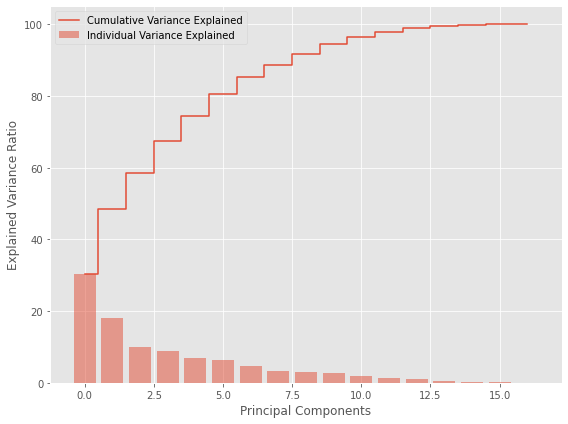

In [65]:
plt.bar(
        range(len( eig_val )), 
        exp_var, 
        alpha=0.50, 
        align='center', 
        label='Individual Variance Explained' 
    )

plt.step( 
        range(len( eig_val )), 
        tot_var, 
        where='mid', 
        label='Cumulative Variance Explained' 
    )

plt.ylabel( 'Explained Variance Ratio' )
plt.xlabel( 'Principal Components' )

plt.legend( loc='best' )
plt.tight_layout()

plt.show()

## PCA using sklearn:

As we don't know how many components we want, we will `start with all the 17 features` and will see --post fitting the model-- the eigen values i.e. the explained variance captured by each of the new components (or eigen vectors)

In [66]:
pca_model = PCA( n_components=17 )

X_PCA = pca_model.fit_transform( concat_df )

X_PCA.shape

(8949, 17)

In [67]:
X_PCA

array([[-0.96379679, -1.46606282,  0.39573743, ..., -0.26028909,
         0.13684757,  0.00516496],
       [-2.20944207,  0.9314024 ,  0.33387435, ...,  0.05581738,
        -0.05347918, -0.02145174],
       [ 1.00741507, -0.16273135,  0.84142919, ...,  0.56293416,
        -0.08127133, -0.03205487],
       ...,
       [ 0.42702771, -1.62261751, -0.9761044 , ...,  0.18904691,
         0.03360216,  0.03905505],
       [-1.4734086 , -0.96283209,  0.78634186, ...,  0.10729409,
        -0.06722513,  0.00935813],
       [ 0.31173729,  0.47211116,  1.47354351, ...,  0.37576295,
        -0.02012912,  0.34696363]])

In [87]:
# Cumulative Variance Explained

pca_var = pca_model.explained_variance_ratio_

print("pcs_var:\t", pca_var)

print("\nnp.cumsum(pca_var):\t", np.cumsum( pca_var ))

pcs_var:	 [0.3025572  0.18098037 0.10055668 0.0900058  0.0691002  0.06295841
 0.04769777 0.03263058 0.02982906 0.02828648 0.01985872 0.01353718
 0.01093886 0.0061391  0.00268024 0.00193625 0.00030709]

np.cumsum(pca_var):	 [0.3025572  0.48353757 0.58409425 0.67410005 0.74320025 0.80615866
 0.85385643 0.88648702 0.91631607 0.94460256 0.96446128 0.97799846
 0.98893732 0.99507642 0.99775666 0.99969291 1.        ]


In [88]:
# Cumulative Variance Explained

var1 = np.cumsum( np.round( pca_model.explained_variance_ratio_, decimals=6 ) * 100 )
var1

array([30.2557, 48.3537, 58.4094, 67.41  , 74.32  , 80.6158, 85.3856,
       88.6487, 91.6316, 94.4602, 96.4461, 97.7998, 98.8937, 99.5076,
       99.7756, 99.9692, 99.9999])

In [89]:
# Summary table showing the Eigen_Vectors, Eigen_Values and the Variance Explained by each of the component Eigen_Vectors

vec_val = pd.DataFrame({
                        'Eigen_Values': pca_model.explained_variance_, 
                        'Cumulative_Variance':var1
                       }, 
                       index = range( 1, 18 ) 
                      ).round(4)
vec_val

,Eigen_Values,Cumulative_Variance
1,4.3968,30.2557
2,2.6300,48.3537
3,1.4613,58.4094
4,1.3080,67.4100
5,1.0042,74.3200
6,0.9149,80.6158
7,0.6931,85.3856
8,0.4742,88.6487
9,0.4335,91.6316
10,0.4111,94.4602


## Conclusion:

1) From both, `manual computation of PCA components` and `PCA via sklearn`, we see that all the 17 components explain the amount of variance.

2) The number of components chosen that cumulatively `explain 85% variation` are `7`, and each individual component explains more than 0.7 variance.

3) <ins>By `considering the 7` dimensions `out of the 17` variables we are `losing only about 15%` of the variation (information) of the data.</ins>

The 7 eigenvectors or principal components are as follows:

In [92]:
# PCA with 7 components

PCA_7 = PCA( n_components=7 )

X_PCA_7 = PCA_7.fit_transform(concat_df)

X_PCA_7, X_PCA_7.shape

(array([[-0.96379679, -1.46606282,  0.39573743, ...,  0.11336196,
         -0.45282204, -0.16102367],
        [-2.20944207,  0.9314024 ,  0.33387435, ..., -0.19120191,
         -0.21470291,  0.70304582],
        [ 1.00741507, -0.16273135,  0.84142919, ..., -0.82296318,
          2.17047791, -1.08830588],
        ...,
        [ 0.42702771, -1.62261751, -0.9761044 , ..., -0.17734959,
         -0.02308401, -0.1297675 ],
        [-1.4734086 , -0.96283209,  0.78634186, ..., -0.23046694,
         -0.23442511,  0.65812947],
        [ 0.31173729,  0.47211116,  1.47354351, ..., -0.40478607,
          0.84575811, -1.27789448]]),
 (8949, 7))

In [94]:
PC = pd.DataFrame( X_PCA_7, columns=[ 'PC1 PC2 PC3 PC4 PC5 PC6 PC7'.split() ] )
PC

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.963797,-1.466063,0.395737,0.147147,0.113362,-0.452822,-0.161024
1,-2.209442,0.931402,0.333874,-0.799582,-0.191202,-0.214703,0.703046
2,1.007415,-0.162731,0.841429,1.325162,-0.822963,2.170478,-1.088306
3,-0.866781,-0.770916,1.725054,0.148277,0.109396,-0.527342,-0.380985
4,-1.306443,-0.603864,0.469885,1.500899,0.189492,0.023789,0.418797
...,...,...,...,...,...,...,...
8944,1.055194,-1.518576,-1.542865,-0.646465,-0.416310,0.319131,0.680914
8945,0.739634,-1.224406,-1.556767,0.090250,0.053046,-0.007028,-0.533323
8946,0.427028,-1.622618,-0.976104,-0.482658,-0.177350,-0.023084,-0.129768
8947,-1.473409,-0.962832,0.786342,-0.353589,-0.230467,-0.234425,0.658129


### Following are the Principal components taking all the 17 variables:

In [97]:
# Taking out the list of columns:

list_cols = concat_df.columns

PC_with_all_variables = pd.DataFrame(
                                    PCA_7.components_.T, 
                                    columns = ['PC_'+str(i) for i in range(1,8)], 
                                    index = list_cols
                                    )
PC_with_all_variables

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
Installment_Purchases,0.021621,-0.096068,-0.167382,-0.081993,0.035790,-0.098499,0.024403
None_Of_the_Purchases,-0.111658,0.049028,0.056590,0.011716,0.038701,-0.079623,0.132863
One_Of_Purchase,-0.030272,-0.008406,0.146727,0.052925,-0.051245,0.102323,-0.051700
BALANCE_FREQUENCY,0.071734,0.291641,-0.320955,0.422057,-0.094484,0.296063,0.460078
ONEOFF_PURCHASES,0.302709,0.226554,0.462988,0.056258,-0.002324,-0.048950,0.082206
INSTALLMENTS_PURCHASES,0.327399,0.139030,-0.110014,-0.097894,0.209276,-0.473947,0.131399
PURCHASES_FREQUENCY,0.381713,-0.011713,-0.371278,-0.051380,-0.081538,0.246192,-0.227260
ONEOFF_PURCHASES_FREQUENCY,0.288618,0.156734,0.248066,0.116115,-0.227363,0.538702,-0.269548
PURCHASES_INSTALLMENTS_FREQUENCY,0.331829,-0.030934,-0.525154,-0.119609,0.063193,-0.064535,-0.145781
CASH_ADVANCE_FREQUENCY,-0.218531,0.460878,-0.071948,-0.218216,-0.045807,0.043832,-0.008001


In [98]:
# Exporting the output
PC_with_all_variables.to_csv('PC_with_all_variables.csv')

In [99]:
# Variance Explained by each of the components

pd.Series(
    PCA_7.explained_variance_ratio_ * 100,
    index=[ 'PC_' + str(i) for i in range(1, 8) ]
)

PC_1    30.255720
PC_2    18.098037
PC_3    10.055668
PC_4     9.000580
PC_5     6.910020
PC_6     6.295841
PC_7     4.769777
dtype: float64

## Variable Reduction (Factor Analysis)

Using Factor Loadings, finding out which of the variables have the `maximum contribution` in each of the components.

> `Loadings` are the correlation between the original variables and the unit-scaled components. 
 
We find the loadings by:
> Loadings=Eigenvectors * sqrt( Eigenvalues )

This results in a loading matrix



In [100]:
loadings = pd.DataFrame(
    ( pca_model.components_.T * np.sqrt( pca_model.explained_variance_ ) ).T,
    index=list_cols,
    columns=['PC1 PC2 PC3 PC4 PC5 PC6 PC7 PC8 PC9 PC10 PC11 PC12 PC13 PC14 PC15 PC16 PC17'.split()]
)

loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Installment_Purchases,0.045337,-0.234129,-0.063475,0.150416,0.634734,0.686506,0.800394,0.605188,0.695793,-0.458226,-0.363837,0.799989,0.397881,0.781212,-0.345954,-0.277006,0.026433
None_Of_the_Purchases,-0.155796,0.079511,-0.013632,0.472963,0.367409,0.225470,-0.018996,0.254180,-0.050167,0.747419,0.731873,0.318451,-0.281613,0.383416,0.652968,0.520304,-0.056044
One_Of_Purchase,-0.202338,0.068408,0.177369,-0.387983,0.559677,-0.132989,-0.448815,0.299872,-0.634826,-0.086973,-0.111702,-0.003980,0.011179,0.378678,-0.053554,-0.187900,0.081477
BALANCE_FREQUENCY,-0.093772,0.013399,0.060529,0.482691,0.064340,-0.111957,-0.058762,0.132797,-0.136792,-0.249565,-0.384458,0.005601,-0.494393,-0.002493,-0.406731,0.569348,-0.248442
ONEOFF_PURCHASES,0.035864,0.038782,-0.051352,-0.094681,-0.002329,0.209712,-0.081708,-0.227836,0.063324,-0.045902,-0.080916,0.062850,-0.300698,0.084132,-0.053952,0.191233,0.856510
INSTALLMENTS_PURCHASES,-0.094216,-0.076160,0.097873,0.283187,-0.046821,-0.453336,0.235485,0.515274,-0.061728,0.041926,0.053425,-0.065455,0.167600,-0.225768,-0.005664,-0.075884,0.429228
PURCHASES_FREQUENCY,0.020317,0.110616,-0.043043,0.383040,0.068441,0.109397,-0.189206,-0.224413,-0.121370,-0.006661,-0.067098,-0.127673,0.587460,0.098056,-0.066537,0.157062,0.098556
ONEOFF_PURCHASES_FREQUENCY,0.145917,-0.044649,-0.058078,0.031971,0.360441,-0.346990,0.124928,-0.230718,0.189364,-0.049453,-0.025017,-0.222362,-0.068685,0.138047,0.123291,-0.000019,-0.000152
PURCHASES_INSTALLMENTS_FREQUENCY,0.036638,-0.031104,-0.003009,-0.359503,0.010052,-0.121312,0.074930,0.064939,0.052207,0.021556,0.021472,0.076626,0.219705,-0.041551,-0.048042,0.463820,-0.017563
CASH_ADVANCE_FREQUENCY,-0.023124,0.000096,0.023690,0.008576,-0.076290,0.052699,0.001043,0.067612,-0.042288,-0.234954,-0.267263,0.009204,0.023548,-0.027684,0.510362,0.080127,-0.001838


In [102]:

# Exporting the output
loadings.to_csv('Loadings1.csv')

## Clustering

Performing Clustering on the 7 components which were found after reducing the dimensionality using PCA.

Finding the optimal clusters using:

1) K-Means
2) Hierarchical Clustering (Agglomerative)
3) Silhouette Score
4) Plotting Elbow Method
5) Plotting Dendrogram
6) Finding the Segment Distributuion for each cluster
7) Performing Profiling



In [103]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist

# Step 1: finding the Cophenetic Distance Correlation coefficient for the different Linkages

#### For the Agglomerative Clustering, the Cophenet distance correlation coefficient helps in deciding which linkage method is the most beneficial for the dataset. 
## The higher the coefficient, the better it is.

In [105]:
for i in ['single', 'complete', 'average']:
    print("Linkage is:\t", i)

    for j in ['euclidean', 'cityblock', 'cosine']:
        
        Z = linkage( X_PCA_7, method=i, metric=j )

        c, coph_dist = cophenet( Z, pdist( X_PCA_7 ) )

        print( "Copehenetic Distance Correlation coefficient for", j, "distance is:\t", c )
    print()

Z = linkage( X_PCA_7, 'ward' )

c, coph_dist = cophenet( Z, pdist( X_PCA_7 ) )

print( "Cophenetic Distance Correlation coefficient for WARD linkage is:\t", c )

Linkage is:	 single
Copehenetic Distance Correlation coefficient for euclidean distance is:	 0.7630936998688108
Copehenetic Distance Correlation coefficient for cityblock distance is:	 0.751609925096481
Copehenetic Distance Correlation coefficient for cosine distance is:	 0.03320673524908469

Linkage is:	 complete
Copehenetic Distance Correlation coefficient for euclidean distance is:	 0.8032936953009642
Copehenetic Distance Correlation coefficient for cityblock distance is:	 0.8047821938260378
Copehenetic Distance Correlation coefficient for cosine distance is:	 0.2689079454114125

Linkage is:	 average
Copehenetic Distance Correlation coefficient for euclidean distance is:	 0.8598689038991886
Copehenetic Distance Correlation coefficient for cityblock distance is:	 0.8698062448693723
Copehenetic Distance Correlation coefficient for cosine distance is:	 0.3398016312224922

Cophenetic Distance Correlation coefficient for WARD linkage is:	 0.3619897408064151


### Conclusion: 
## From the above, the best method is `Average` computed using `CityBlock` distance

# Step 2: Finding the Optimal clusters using K-Means, Silhouette Coefficient score for BOTH K-Means and Agglomerative Clustering

In [107]:
wcss = []
sil_kmeans = []
sil_agc = []

for i in range(3, 9):

    # K-Means clustering
    kmeans = KMeans( 
                        n_clusters = i, 
                        n_init=100,
                        init='k-means++',
                        random_state=0
                    )
    kmeans.fit( X_PCA_7 )

    # Inertia and Silhouette score for Clustering using K-Means,
    in_km = kmeans.inertia_
    wcss.append(in_km)

    sil_km = silhouette_score(X_PCA_7, kmeans.labels_)
    sil_kmeans.append(sil_km)

    # Agglometric clusters and its Silhouette score
    agc = AgglomerativeClustering( 
        n_clusters = i,
        affinity='cityblock',
        linkage='average'
     )
    agc.fit( X_PCA_7 )
    sil_ag = silhouette_score( X_PCA_7, agc.labels_ )
    sil_agc.append( sil_ag )

    print("Number of clusters:\t", i)
    print("KMeans inertia:\t", in_km)
    print("Silhouette score for KMeans:\t", sil_km)
    print("Silhouette score for AGC (HCA):\t", sil_ag)
    print()

Number of clusters:	 3
KMeans inertia:	 74229.69940392487
Silhouette score for KMeans:	 0.24784561379166523
Silhouette score for AGC (HCA):	 0.8499511136280252

Number of clusters:	 4
KMeans inertia:	 63708.48198506325
Silhouette score for KMeans:	 0.2598407365415647
Silhouette score for AGC (HCA):	 0.8276634947082336

Number of clusters:	 5
KMeans inertia:	 55828.66164055146
Silhouette score for KMeans:	 0.2887017139510506
Silhouette score for AGC (HCA):	 0.7930548693789233

Number of clusters:	 6
KMeans inertia:	 48750.0789033694
Silhouette score for KMeans:	 0.28855784749665536
Silhouette score for AGC (HCA):	 0.790751456124703

Number of clusters:	 7
KMeans inertia:	 42422.405916652846
Silhouette score for KMeans:	 0.3023889650761614
Silhouette score for AGC (HCA):	 0.7550012654147572

Number of clusters:	 8
KMeans inertia:	 38669.58294910646
Silhouette score for KMeans:	 0.3074856699207036
Silhouette score for AGC (HCA):	 0.7545763220623828



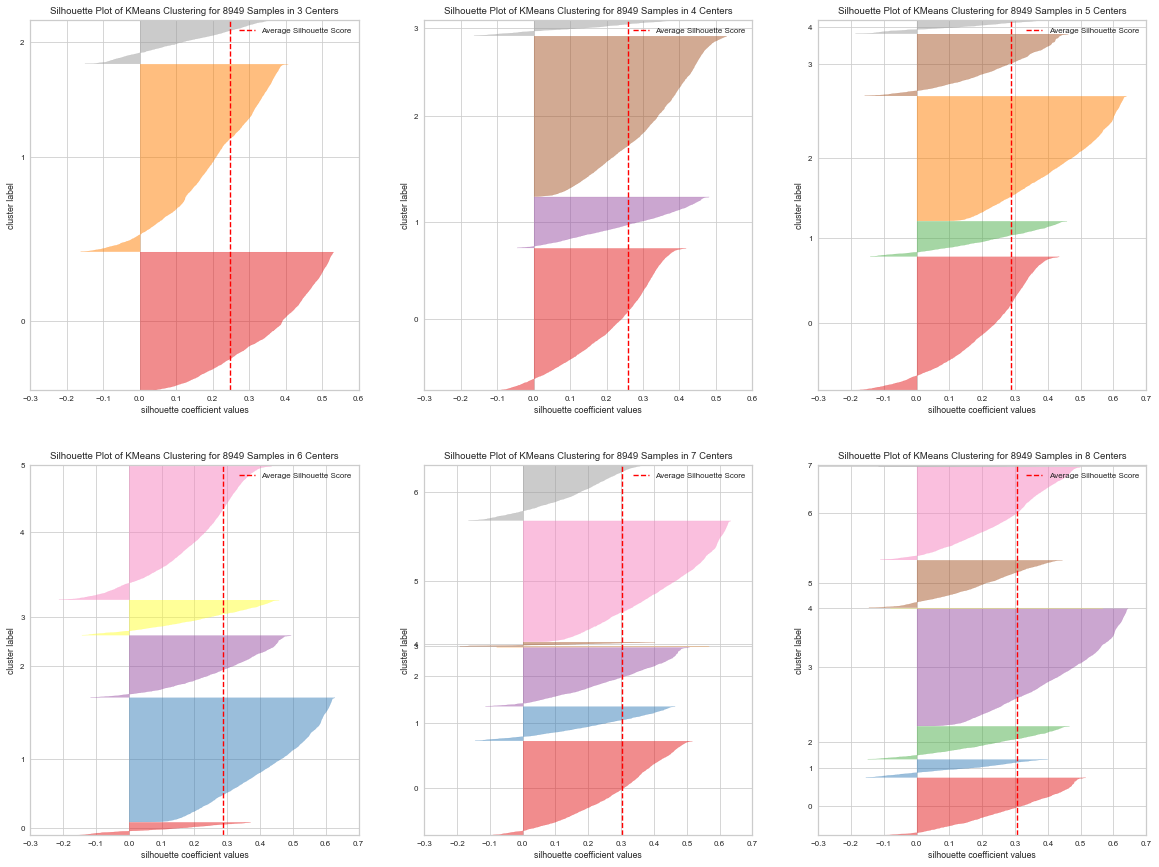

In [108]:
from yellowbrick.cluster import SilhouetteVisualizer

plt.style.use('seaborn-paper')
fig, axs = plt.subplots( 2, 3, figsize = ( 20, 15 ) )
axs = axs.reshape(6)

for i, k in enumerate( range( 3, 9 ) ):
    ax = axs[i]
    sil = SilhouetteVisualizer(
                                    KMeans(
                                        n_clusters = k,
                                        n_init=100,
                                        init='k-means++',
                                        random_state=0
                                    ),
                                    ax=ax
                               )
    sil.fit( X_PCA_7 )
    sil.finalize()

# 3. Elbow Method

### `Inertia` or `the sum of squared errors within the clusters` is aka the `Cluster Error`
> Cluster error decreases after some clusters

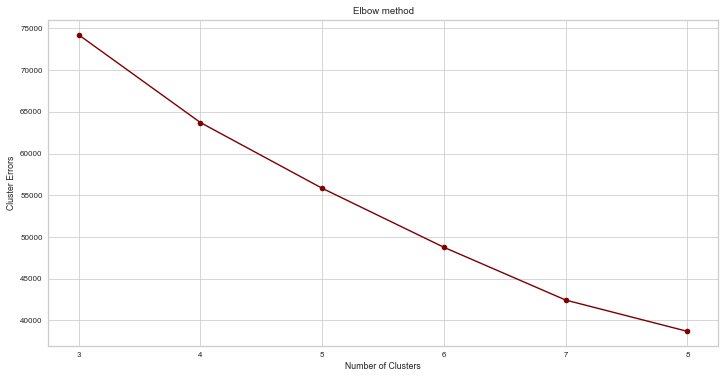

In [110]:
# Plotting graph of Elbow Method

plt.figure( figsize=( 12, 6 ) )
plt.plot( range(3, 9), wcss, c = '#800000', marker='o' )
plt.title("Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("Cluster Errors")
plt.show()

# Inference of Elbow method

The sum of squared distance of each data point within a cluster from its respective centroid is k/a `Inertia`

The `K` at which the inertia stops to drop significantly (decided using the Elbow method) is the `best K`

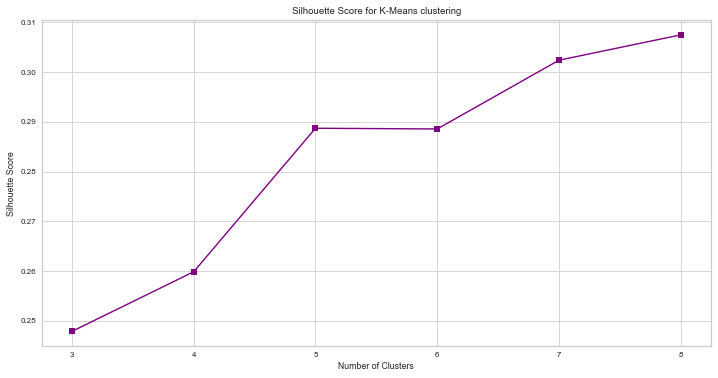

In [111]:
# PLotting the Silhouette Score for the clusters found from K-Means

plt.figure( figsize=( 12,6 ) )
plt.plot( 
            range(3, 9), 
            sil_kmeans,             # clusters from K-Means clustering
            marker='s', 
            c='purple' 
        )
plt.title("Silhouette Score for K-Means clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

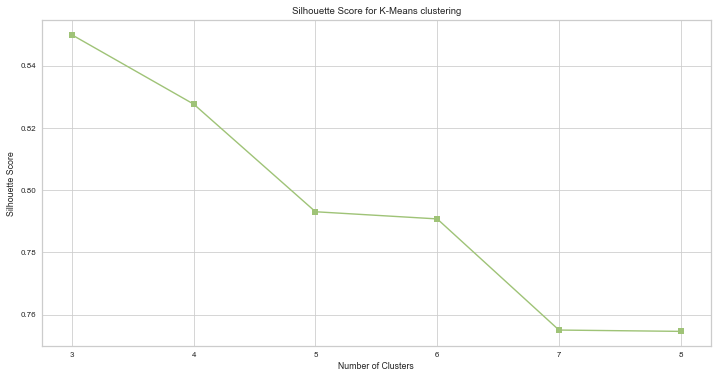

In [113]:
# PLotting the Silhouette Score for the clusters found from Agglomerative Clustering

plt.figure( figsize=( 12,6 ) )
plt.plot( 
            range(3, 9), 
            sil_agc,            # clusters from Agglomerative Clustering
            marker='s', 
            c='g' 
        )
plt.title("Silhouette Score for K-Means clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# 4. Dendogram

### The `p-value` tells `how the deep the Dendrogram goes`. 
> The lesser the p value, the farther away the values would be on the x-axis

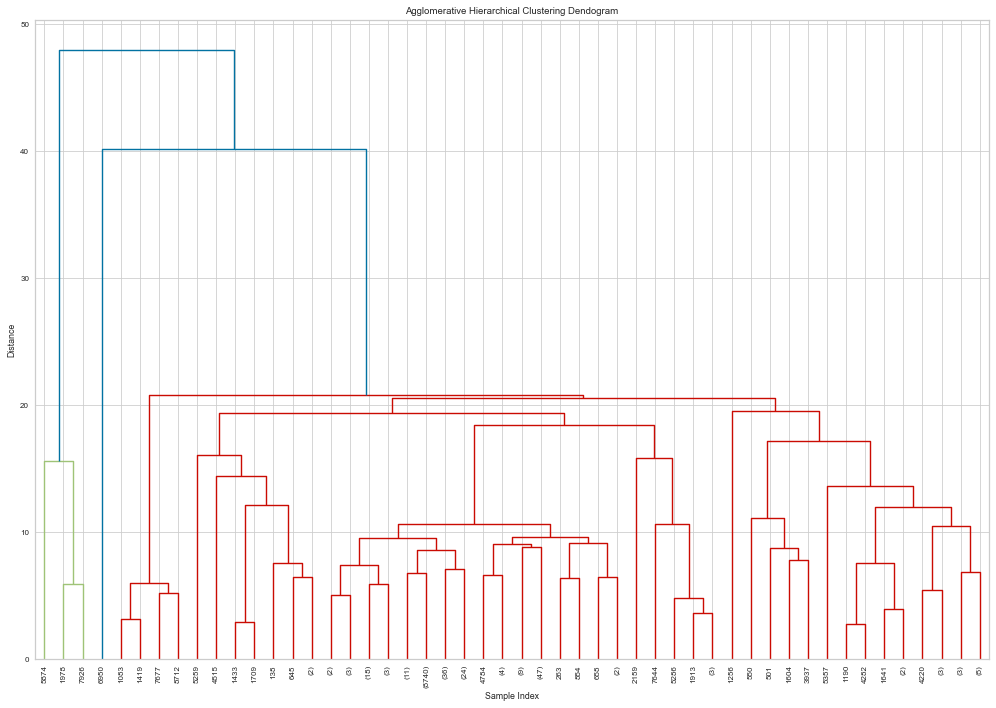

In [114]:
Z = linkage( 
                concat_df,
                method='average',
                metric='euclidean'
            )

plt.figure( figsize=(14, 10) )
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")

dendrogram(
    Z,
    leaf_rotation=90,
    leaf_font_size=8,
    truncate_mode='level',
    p=9
)

plt.tight_layout()
plt.show()

# Conclusion:
## From the above Elbow method, Silhouette Coefficient Scores for K-Means & Agglomerative Clustering, and from Dendrogram, can see that the clusters 4 and 5 look similar.

## We see that the Silhouette Scores for K = 5 is the highest (0.28857) and then the Silhouette Coefficient for K = 4 is 0.26015, which also gives the nearby score. 

## The clusters K = 4 or K = 5 `look very similar`, so now we'll use the other methods and best practices. That is, by `finding out the Segment Distribution` and `performing Profiling`, we'll check the similarities and dissimilarities between the segments and see which cluster is giving the best solution.

# Applying Clustering and `visualising the spread` of the data

finding out if the data points have been clustered correctly through visualization

Scatter plot for Principal Components 0 and 1


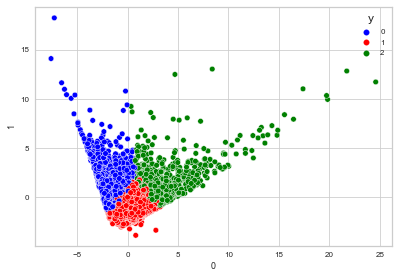

Scatter plot for Principal Components 1 and 2


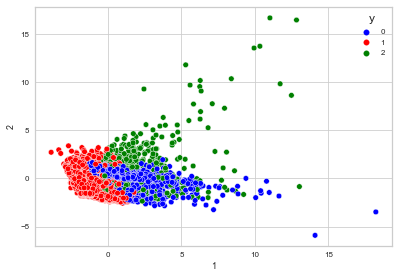

Scatter plot for Principal Components 2 and 3


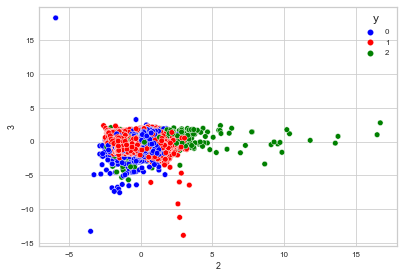

Scatter plot for Principal Components 3 and 4


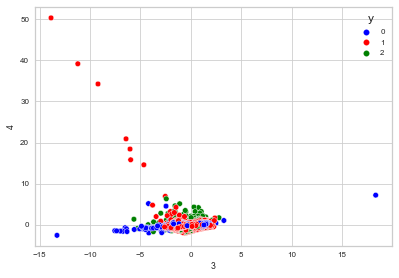

Scatter plot for Principal Components 4 and 5


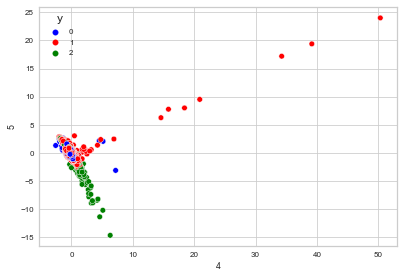

Scatter plot for Principal Components 5 and 6


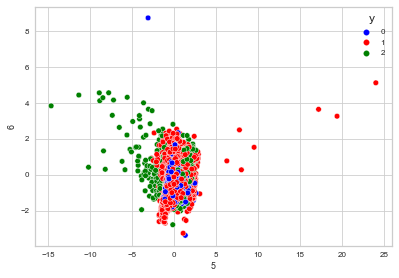

In [115]:
#K-Means Clusters:   For K= 3
kmeans = KMeans(n_clusters = 3, n_init = 100, init='k-means++', random_state = 0)
kmeans.fit(X_PCA_7)

# Taking into each dataframes
df_pca = pd.DataFrame(X_PCA_7)
y_lab = pd.Series(kmeans.labels_, name = 'y') # labels for clusters

#concatenating the dataframe:
df_final = pd.concat([df_pca, y_lab], axis = 1)

# As there are 7 dimensions, hence we need to plot for each of the different pairs to visualize the spread of the data:

for i in range(6):
    print('Scatter plot for Principal Components', i, 'and', i+1)
    sns.scatterplot(df_pca[i], df_pca[i+1], hue = df_final['y'], palette = ['blue', 'red', 'green'])
    plt.show()

Scatter plot for Principal Components 0 and 1


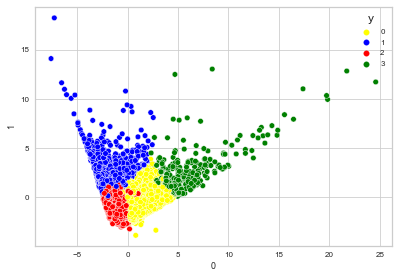

Scatter plot for Principal Components 1 and 2


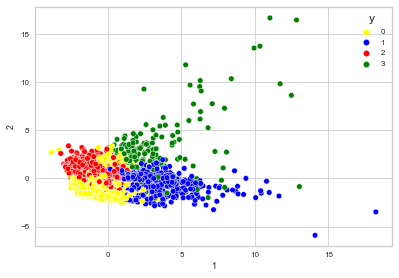

Scatter plot for Principal Components 2 and 3


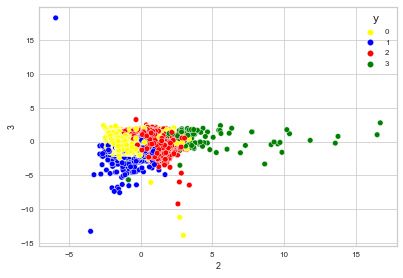

Scatter plot for Principal Components 3 and 4


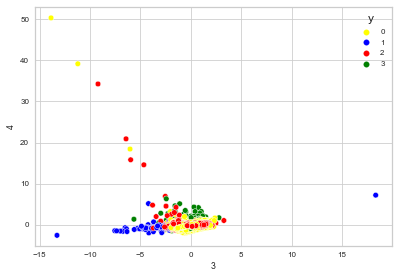

Scatter plot for Principal Components 4 and 5


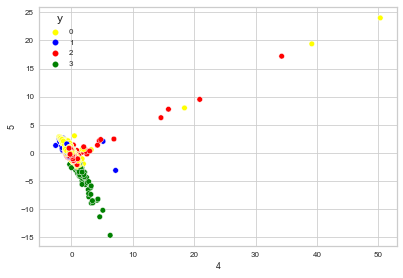

Scatter plot for Principal Components 5 and 6


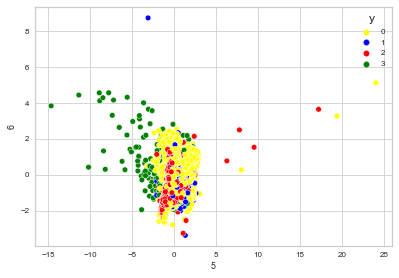

In [117]:
#K-Means Clusters:   For K= 4
kmeans = KMeans(n_clusters = 4, n_init = 100, init='k-means++', random_state = 0)
kmeans.fit(X_PCA_7)

# Taking into each dataframes
df_pca = pd.DataFrame(X_PCA_7)
y_lab = pd.Series(kmeans.labels_, name = 'y') # labels for clusters

#concatenating the dataframe:
df_final = pd.concat([df_pca, y_lab], axis = 1)

# As there are 7 dimensions, hence we need to plot for each of the different pairs to visualize the spread of the data:

for i in range(6):
    print('Scatter plot for Principal Components', i, 'and', i+1)
    sns.scatterplot(df_pca[i], df_pca[i+1], hue = df_final['y'], palette = ['yellow', 'blue', 'red', 'green'])
    plt.show()

Scatter plot for Principal Components 0 and 1


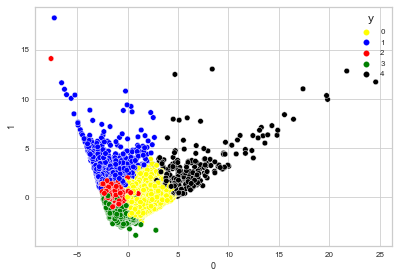

Scatter plot for Principal Components 1 and 2


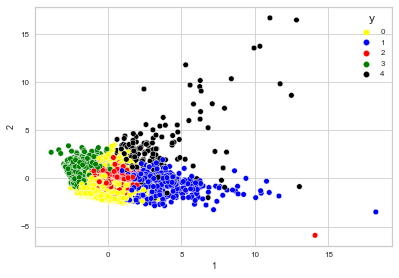

Scatter plot for Principal Components 2 and 3


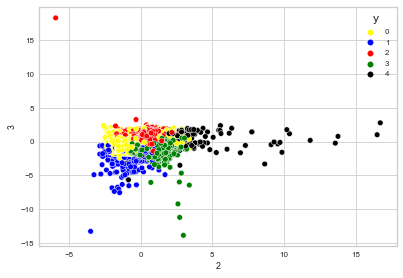

Scatter plot for Principal Components 3 and 4


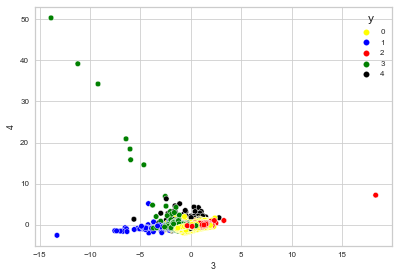

Scatter plot for Principal Components 4 and 5


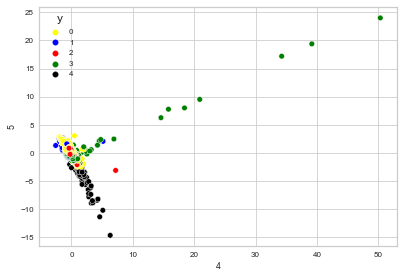

Scatter plot for Principal Components 5 and 6


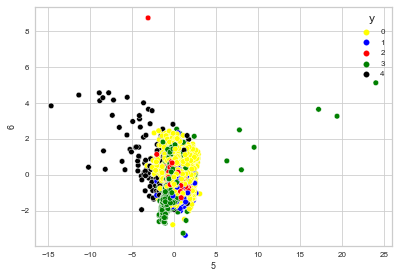

In [118]:
#K-Means Clusters:   For K= 5
kmeans = KMeans(n_clusters = 5, n_init = 100, init='k-means++', random_state = 0)
kmeans.fit(X_PCA_7)

# Taking into each dataframes
df_pca = pd.DataFrame(X_PCA_7)
y_lab = pd.Series(kmeans.labels_, name = 'y') # labels for clusters

#concatenating the dataframe:
df_final = pd.concat([df_pca, y_lab], axis = 1)

# As there are 7 dimensions, hence we need to plot for each of the different pairs to visualize the spread of the data:

for i in range(6):
    print('Scatter plot for Principal Components', i, 'and', i+1)
    sns.scatterplot(df_pca[i], df_pca[i+1], hue = df_final['y'], palette = ['yellow', 'blue', 'red', 'green', 'black'])
    plt.show()

# Segment Distribution

Segment distribution gives the percentage of values in each Segment

In [119]:
# Step 1: Making K-Means Cluster and Labels for finding out the distribution of Segments and then performing Profiling

# K = 3

km_3 = KMeans(n_clusters = 3, n_init = 100, init='k-means++', random_state = 0)             
KM_3 = km_3.fit(X_PCA_7)

# Labels of Cluster 3
KM_3.labels_

array([1, 0, 1, ..., 1, 0, 1])

In [120]:
# Centroids for Cluster 3:

KM_3.cluster_centers_

array([[-1.76479658,  0.93587491,  0.13620598,  0.18538487,  0.04654055,
        -0.06395186,  0.23937914],
       [ 0.43005603, -0.99827666, -0.21376279, -0.15160496, -0.025684  ,
         0.01894025, -0.13917789],
       [ 3.79706665,  1.3431978 ,  0.49391727,  0.06497734, -0.03762582,
         0.12296967, -0.16269885]])

## Taking Clusters for K = 4,5, 6,7,8

In [121]:
KM_4 = KMeans(n_clusters = 4, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_5 = KMeans(n_clusters = 5, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_6 = KMeans(n_clusters = 6, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_7 = KMeans(n_clusters = 7, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_8 = KMeans(n_clusters = 8, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)

# Appending the Cluster labels to the Original Data: (not to Standardized data)
original_df['cluster_3'] = KM_3.labels_
original_df['cluster_4'] = KM_4.labels_
original_df['cluster_5'] = KM_5.labels_
original_df['cluster_6'] = KM_6.labels_
original_df['cluster_7'] = KM_7.labels_
original_df['cluster_8'] = KM_8.labels_

In [122]:
# the new data set has Original variables + the Cluster Labels from each of the clusters got from K-Means
original_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,...,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,1,0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,...,7.950000,0.000000,0.040901,1.446508,1,2,3,2,2,0
1,0,1,0,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,...,0.000000,536.912124,0.457495,3.826241,0,1,2,1,5,3
2,0,0,1,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,...,64.430833,0.000000,0.332687,0.991682,1,0,0,4,6,5
3,0,0,1,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,...,124.916667,17.149001,0.222223,0.000000,1,2,3,2,2,0
4,0,0,1,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,...,1.333333,0.000000,0.681429,2.771075,0,2,2,1,5,3


In [123]:
# Finding the Segment Distribution for cluster K = 3
pd.Series.sort_index( original_df.cluster_3.value_counts() ) / sum( original_df.cluster_3.value_counts() )

0    0.375237
1    0.507990
2    0.116773
Name: cluster_3, dtype: float64

In [124]:
# Segment Distribution for cluster K = 4
pd.Series.sort_index( original_df.cluster_4.value_counts() ) / sum( original_df.cluster_4.value_counts() )

0    0.385741
1    0.138339
2    0.435132
3    0.040787
Name: cluster_4, dtype: float64

In [125]:
# Segment Distribution for cluster K = 5
pd.Series.sort_index( original_df.cluster_5.value_counts() ) / sum( original_df.cluster_5.value_counts() )

0    0.363169
1    0.095430
2    0.338474
3    0.167728
4    0.035199
Name: cluster_5, dtype: float64

In [126]:
# Segment Distribution for cluster K = 6
pd.Series.sort_index( original_df.cluster_6.value_counts() ) / sum( original_df.cluster_6.value_counts() )

0    0.035199
1    0.337691
2    0.168063
3    0.095206
4    0.363057
5    0.000782
Name: cluster_6, dtype: float64

In [127]:
# Segment Distribution for cluster K = 7
pd.Series.sort_index( original_df.cluster_7.value_counts() ) / sum( original_df.cluster_7.value_counts() )

0    0.256341
1    0.092748
2    0.159906
3    0.000782
4    0.011510
5    0.328975
6    0.149737
Name: cluster_7, dtype: float64

In [128]:
# Segment Distribution for cluster K = 8
pd.Series.sort_index( original_df.cluster_8.value_counts() ) / sum( original_df.cluster_8.value_counts() )

0    0.156554
1    0.048721
2    0.089395
3    0.319365
4    0.000782
5    0.129065
6    0.252989
7    0.003129
Name: cluster_8, dtype: float64

# 6. Profiling
### The `goal of Profiling` is to `be able to differentiate between the groups with the proper distinction`.
> That means each group has some unique characteristics about it and then that cluster is the ideal solution to segment the values.

`Steps` to do Profiling are:
1) Find the count of each segment (value_counts) ----> that gives `how many observations or records are present in each segment`
2) For each of the variable: find the `overall average` and the `individual segment-wise average`
3) Perform the above two steps for each K value to find the best profiling

## Step 1 of Profiling:
Finding how many observations or records are present in each segment

In [129]:
# Step 1a: Get the total size of the cluster
original_df.cluster_3.size

# Step 1b: Get the break up of the values in each segment
    # which gives how many observations are there in each of the respective segment

original_df.cluster_3.value_counts()

1    4546
0    3358
2    1045
Name: cluster_3, dtype: int64

In [130]:
# Using the Sort Index provides:
    # the value counts based on the Segment Label (0,1,2 depending upon the K-value) in the index
        # and not based on the highest value within the segments

pd.Series.sort_index( original_df.cluster_3.value_counts() )

0    3358
1    4546
2    1045
Name: cluster_3, dtype: int64

### Repeat the above two steps for other clusters K = 4 to K = 8 and then combine all into a single array.

In [131]:
# combining the size for each cluster K value into one single array:

size=pd.concat(
                [
                    pd.Series(original_df.cluster_3.size), 
                    pd.Series.sort_index(original_df.cluster_3.value_counts()), 
                    pd.Series.sort_index(original_df.cluster_4.value_counts()),
                    pd.Series.sort_index(original_df.cluster_5.value_counts()), 
                    pd.Series.sort_index(original_df.cluster_6.value_counts()),
                    pd.Series.sort_index(original_df.cluster_7.value_counts()), 
                    pd.Series.sort_index(original_df.cluster_8.value_counts())
                ]
            )

# Gives the size of Segments for each of the Clusters
size

0    8949
0    3358
1    4546
2    1045
0    3452
1    1238
2    3894
3     365
0    3250
1     854
2    3029
3    1501
4     315
0     315
1    3022
2    1504
3     852
4    3249
5       7
0    2294
1     830
2    1431
3       7
4     103
5    2944
6    1340
0    1401
1     436
2     800
3    2858
4       7
5    1155
6    2264
7      28
dtype: int64

In [132]:

# Segment Size
Seg_size=pd.DataFrame( size, columns=['Seg_size'] )

# Segment Distribtuion % wise
Seg_Pct = pd.DataFrame( size / original_df.cluster_3.size, columns=['Seg_Pct'] )

# Taking Transpose of Segment Percentage
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.375237,0.50799,0.116773,0.385741,0.138339,0.435132,0.040787,0.363169,0.09543,...,0.328975,0.149737,0.156554,0.048721,0.089395,0.319365,0.000782,0.129065,0.252989,0.003129


In [133]:
# Concatenating the Segment Size and Segment Percentage
pd.concat( [ Seg_size.T, Seg_Pct.T ], axis=0 )

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8949.0,3358.000000,4546.00000,1045.000000,3452.000000,1238.000000,3894.000000,365.000000,3250.000000,854.00000,...,2944.000000,1340.000000,1401.000000,436.000000,800.000000,2858.000000,7.000000,1155.000000,2264.000000,28.000000
Seg_Pct,1.0,0.375237,0.50799,0.116773,0.385741,0.138339,0.435132,0.040787,0.363169,0.09543,...,0.328975,0.149737,0.156554,0.048721,0.089395,0.319365,0.000782,0.129065,0.252989,0.003129


# Step 2 of Profiling:
  For each of the variable, find the overall average and the individual segment-wise average

## A `good indication of the distribution` of data is the `mean` value, 
hence will find the average value for each variable and for each cluster.

In [134]:
# Overall each variables-wise Avg
original_df.apply(np.mean).T

Installment_Purchases                  0.252542
None_Of_the_Purchases                  0.228070
One_Of_Purchase                        0.209409
BALANCE                             1564.647593
BALANCE_FREQUENCY                      0.877350
PURCHASES                           1003.316936
ONEOFF_PURCHASES                     592.503572
INSTALLMENTS_PURCHASES               411.113579
CASH_ADVANCE                         978.959616
PURCHASES_FREQUENCY                    0.490405
ONEOFF_PURCHASES_FREQUENCY             0.202480
PURCHASES_INSTALLMENTS_FREQUENCY       0.364478
CASH_ADVANCE_FREQUENCY                 0.135141
CASH_ADVANCE_TRX                       3.249078
PURCHASES_TRX                         14.711476
CREDIT_LIMIT                        4494.449450
PAYMENTS                            1733.336511
MINIMUM_PAYMENTS                     845.003358
PRC_FULL_PAYMENT                       0.153732
TENURE                                11.517935
Monthly_Avg_Purchase                  86

In [135]:
# Grouping-by over each cluster to find the Segment-wise average for each variable
original_df.groupby('cluster_3').apply(np.mean).T

cluster_3,0,1,2
Installment_Purchases,0.073258,0.439067,0.017225
None_Of_the_Purchases,0.565515,0.031236,0.000000
One_Of_Purchase,0.252531,0.208755,0.073684
BALANCE,2504.779770,672.690120,2423.857947
BALANCE_FREQUENCY,0.944531,0.803102,0.984468
PURCHASES,221.712067,720.561518,4744.977493
ONEOFF_PURCHASES,164.722534,331.415458,3102.929694
INSTALLMENTS_PURCHASES,57.142716,389.491912,1642.621962
CASH_ADVANCE,2172.651223,163.805328,689.270600
PURCHASES_FREQUENCY,0.149574,0.635632,0.953860


In [136]:
# Concatinating the above two averages

Profiling_output = pd.concat(
                    [
                        original_df.apply(lambda x: x.mean()).T,
                        original_df.groupby('cluster_3').apply(lambda x: x.mean()).T,
                        original_df.groupby('cluster_4').apply(lambda x: x.mean()).T,
                        original_df.groupby('cluster_5').apply(lambda x: x.mean()).T, 
                        original_df.groupby('cluster_6').apply(lambda x: x.mean()).T,
                        original_df.groupby('cluster_7').apply(lambda x: x.mean()).T, 
                        original_df.groupby('cluster_8').apply(lambda x: x.mean()).T
                    ], 
                    axis=1
                )
Profiling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Installment_Purchases,0.252542,0.073258,0.439067,0.017225,0.420336,0.087237,0.177709,0.024658,0.383077,0.088993,...,0.098845,0.000000,0.359029,0.018349,0.087500,0.101120,0.571429,0.000000,0.611307,0.071429
None_Of_the_Purchases,0.228070,0.565515,0.031236,0.000000,0.000000,0.487884,0.369029,0.000000,0.000000,0.435597,...,0.474185,0.000000,0.192719,0.000000,0.438750,0.495801,0.428571,0.000000,0.000000,0.000000
One_Of_Purchase,0.209409,0.252531,0.208755,0.073684,0.077926,0.209208,0.337956,0.082192,0.084923,0.210773,...,0.306046,0.236567,0.325482,0.036697,0.212500,0.290413,0.000000,0.346320,0.000000,0.071429
BALANCE,1564.647593,2504.779770,672.690120,2423.857947,1004.708685,3747.504954,1204.228343,3301.645543,1070.898198,3996.276660,...,1933.950087,1651.271782,128.648840,3108.876916,4019.903812,1961.650370,1.796679,1259.880039,895.540620,5761.648320
BALANCE_FREQUENCY,0.877350,0.944531,0.803102,0.984468,0.930650,0.962854,0.792674,0.986618,0.965694,0.956709,...,0.975992,0.977054,0.404697,0.988039,0.955932,0.975299,0.277597,0.968639,0.951115,0.980195
PURCHASES,1003.316936,221.712067,720.561518,4744.977493,1259.336874,429.449588,287.402797,8166.156959,1367.077105,548.300609,...,242.880126,2787.315709,323.704682,5930.758440,518.998575,212.513212,425.322857,1863.825091,902.325645,25651.435714
ONEOFF_PURCHASES,592.503572,164.722534,331.415458,3102.929694,600.426330,281.872876,227.197260,5468.432959,676.677517,353.967307,...,199.918655,2046.122858,207.672291,3643.225046,332.685262,169.458275,0.000000,1523.492199,174.940808,18455.715357
INSTALLMENTS_PURCHASES,411.113579,57.142716,389.491912,1642.621962,659.256222,147.658837,60.408844,2699.367836,690.674815,194.373958,...,43.253801,741.192851,116.244240,2288.909541,186.356712,43.239216,425.322857,340.622026,727.779929,7195.720357
CASH_ADVANCE,978.959616,2172.651223,163.805328,689.270600,245.541464,4297.343032,612.632584,568.215104,261.965004,5116.205209,...,945.939496,335.939302,360.562364,568.267969,5230.097128,992.864752,417.321256,293.970067,266.248348,1459.599916
PURCHASES_FREQUENCY,0.490405,0.149574,0.635632,0.953860,0.883502,0.257225,0.172857,0.951344,0.897408,0.308017,...,0.148350,0.910903,0.256652,0.961140,0.296724,0.131488,0.476190,0.845917,0.879118,0.933929


# Combining the outputs from steps 1 and 2

In [137]:
## Concatenating the segment size, segment distribution, the overall averages, and the individual segment-wise average 
Profiling_output_final=pd.concat(
                                    [
                                        Seg_size.T, Seg_Pct.T, Profiling_output
                                    ], 
                                    axis=0
                                )

# Adding column names
Profiling_output_final.columns = [
                                'Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8'
                            ]
Profiling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8949.000000,3358.000000,4546.000000,1045.000000,3452.000000,1238.000000,3894.000000,365.000000,3250.000000,854.000000,...,2944.000000,1340.000000,1401.000000,436.000000,800.000000,2858.000000,7.000000,1155.000000,2264.000000,28.000000
Seg_Pct,1.000000,0.375237,0.507990,0.116773,0.385741,0.138339,0.435132,0.040787,0.363169,0.095430,...,0.328975,0.149737,0.156554,0.048721,0.089395,0.319365,0.000782,0.129065,0.252989,0.003129
Installment_Purchases,0.252542,0.073258,0.439067,0.017225,0.420336,0.087237,0.177709,0.024658,0.383077,0.088993,...,0.098845,0.000000,0.359029,0.018349,0.087500,0.101120,0.571429,0.000000,0.611307,0.071429
None_Of_the_Purchases,0.228070,0.565515,0.031236,0.000000,0.000000,0.487884,0.369029,0.000000,0.000000,0.435597,...,0.474185,0.000000,0.192719,0.000000,0.438750,0.495801,0.428571,0.000000,0.000000,0.000000
One_Of_Purchase,0.209409,0.252531,0.208755,0.073684,0.077926,0.209208,0.337956,0.082192,0.084923,0.210773,...,0.306046,0.236567,0.325482,0.036697,0.212500,0.290413,0.000000,0.346320,0.000000,0.071429
BALANCE,1564.647593,2504.779770,672.690120,2423.857947,1004.708685,3747.504954,1204.228343,3301.645543,1070.898198,3996.276660,...,1933.950087,1651.271782,128.648840,3108.876916,4019.903812,1961.650370,1.796679,1259.880039,895.540620,5761.648320
BALANCE_FREQUENCY,0.877350,0.944531,0.803102,0.984468,0.930650,0.962854,0.792674,0.986618,0.965694,0.956709,...,0.975992,0.977054,0.404697,0.988039,0.955932,0.975299,0.277597,0.968639,0.951115,0.980195
PURCHASES,1003.316936,221.712067,720.561518,4744.977493,1259.336874,429.449588,287.402797,8166.156959,1367.077105,548.300609,...,242.880126,2787.315709,323.704682,5930.758440,518.998575,212.513212,425.322857,1863.825091,902.325645,25651.435714
ONEOFF_PURCHASES,592.503572,164.722534,331.415458,3102.929694,600.426330,281.872876,227.197260,5468.432959,676.677517,353.967307,...,199.918655,2046.122858,207.672291,3643.225046,332.685262,169.458275,0.000000,1523.492199,174.940808,18455.715357
INSTALLMENTS_PURCHASES,411.113579,57.142716,389.491912,1642.621962,659.256222,147.658837,60.408844,2699.367836,690.674815,194.373958,...,43.253801,741.192851,116.244240,2288.909541,186.356712,43.239216,425.322857,340.622026,727.779929,7195.720357


In [138]:
# Exporting the final Profiling output
Profiling_output_final.to_csv('Profiling_output_final.csv')

# Conclusion from Profiling:
## After profiling, we see that there are 5 clusters that give us the best solution. 

## We can segment the customers into 5 buckets as:

1. `Big Tickets`: These are people who make purchases very frequently and also of large amount.
2. `Medium Tickets`: These people prefer to make installment purchases and do frequently purchase.
3. `Rare Purchasers`: People in this group do purchase but rarely. They often make one-off purchases. 
4. `Beginners`: These are beginning to purchase yet long to go.
5. `Risk`: These are very rare purchasers indicated by low amount of purchases made and less frequency of the purchase.

<hr>

# Implementation Code for new customer to classify into Segments

## `To segment the new unseen data`, firstly we would do the exact same data preparation steps that were followed above for the training data.

After the preliminary data cleaning steps, creating the dummy variables, scaling the numerical data and concatenating these two, let's say the concatenated new customer data is stored in the variable: `concat_new_cust`

We will `scale` the new customers with .transform function as .transform(x_numerical_features)

Post which we will use the .predict function to `predict the new Segments`. 

Using the concat_new_cust the code will follow as below:



In [ ]:
# Predicting for the new data using the 5 clusters class
KM_5.predict(concat_new_cust)

In [ ]:
# adding Segment or Group to the data as column:
new_customer_data['Segment'] = KM_5.predict(concat_new_cust)

In [ ]:
new_customer_data

# The above new customer dataset will show each customer or record mapped to its respective segment